In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_1000_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_1000_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_1000_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_1000_5000_100_2_5.csv")

In [4]:
TtotalOrdersNPC

Unnamed: 0  time portfolio  stock  order
0                 0   993     sniel     86    1.0
1                 0   993     yeqal     83   -1.0
2                 2   993     yeqal     85    2.0
3                 0   993     tcnoe     73    3.0
4                 1   993     tcnoe     74   -3.0
...             ...   ...       ...    ...    ...
2136648           2  5992     lekvh     62   16.0
2136649           0  5992     uesjc     42    5.0
2136650           3  5992     uesjc     50   -7.0
2136651           1  5992     vuemj     58    7.0
2136652           2  5992     vuemj     89   -3.0

[2136653 rows x 5 columns]

In [5]:
type(TtotalOrdersNPC)

cudf.core.dataframe.DataFrame

# minSep = 1

In [25]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192,1)

TypeError: where() missing 1 required positional argument: 'cond'

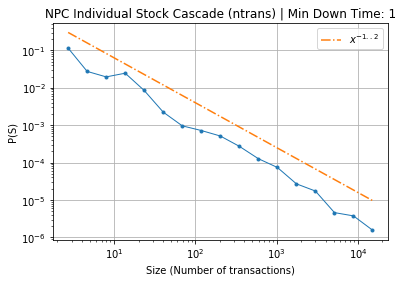

In [12]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

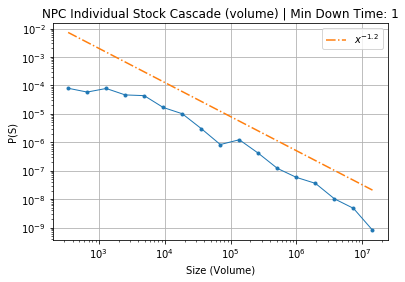

In [13]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

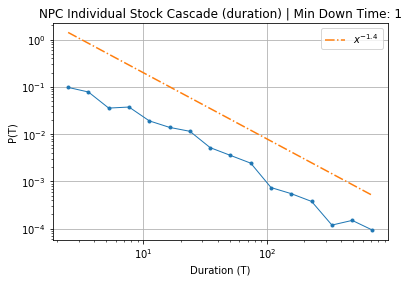

In [14]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [15]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 2)

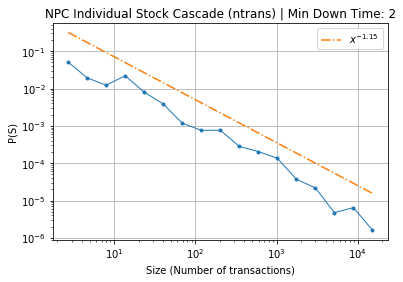

In [16]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

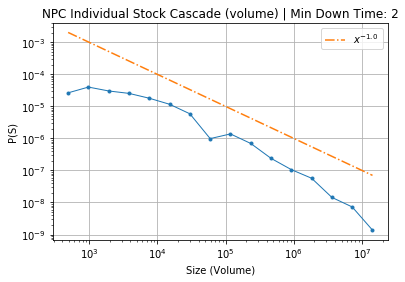

In [17]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

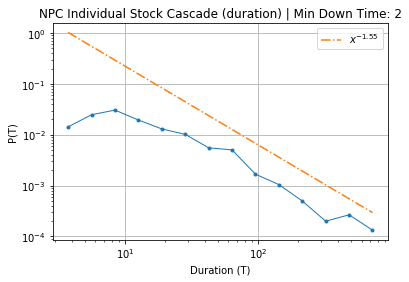

In [18]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [19]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 5)

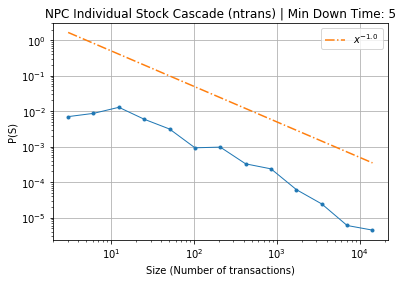

In [20]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

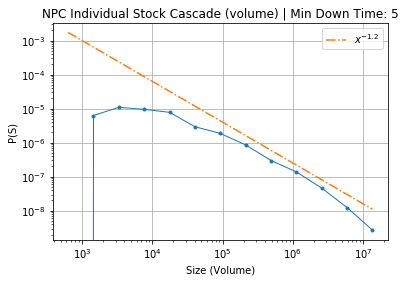

In [21]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

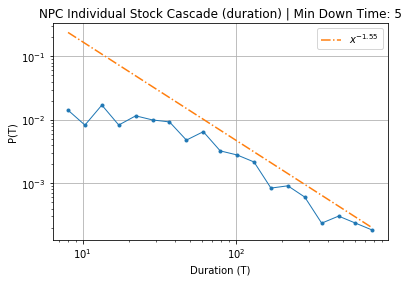

In [22]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [23]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 10)

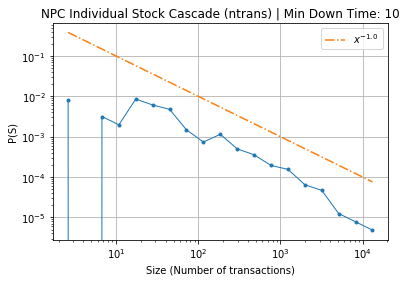

In [24]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

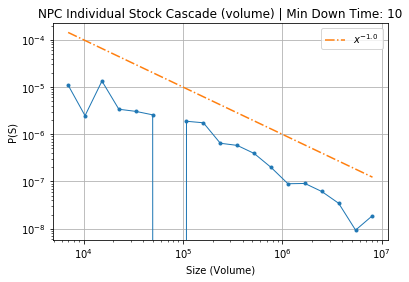

In [25]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

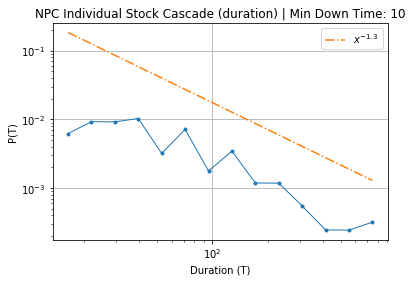

In [26]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [6]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    TtotalOrders = TtotalOrdersNPC
    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [8]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2136653
Cascade length:  5629
New Orders left:  2131024
making new cascade


OG Orders left:  2131024
Cascade length:  5282
New Orders left:  2125742
making new cascade


OG Orders left:  2125742
Cascade length:  4954
New Orders left:  2120788
making new cascade


OG Orders left:  2120788
Cascade length:  3791
New Orders left:  2116997
making new cascade


OG Orders left:  2116997


KeyboardInterrupt: 

In [7]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2136653
Cascade length:  2798
New Orders left:  2133855
making new cascade


OG Orders left:  2133855
Cascade length:  2795
New Orders left:  2131060
making new cascade


OG Orders left:  2131060
Cascade length:  2588
New Orders left:  2128472
making new cascade


OG Orders left:  2128472
Cascade length:  2489
New Orders left:  2125983
making new cascade


OG Orders left:  2125983
Cascade length:  2456
New Orders left:  2123527
making new cascade


OG Orders left:  2123527
Cascade length:  1
New Orders left:  2123526
making new cascade


OG Orders left:  2123526
Cascade length:  2643
New Orders left:  2120883
making new cascade


OG Orders left:  2120883
Cascade length:  2123
New Orders left:  2118760
making new cascade


OG Orders left:  2118760
Cascade length:  2056
New Orders left:  2116704
making new cascade


OG Orders left:  2116704
Cascade length:  4
New Orders left:  2116700
making new cascade


OG Orders left:  2116700
Cascade length:  2213
New Orders left:  2

Cascade length:  2030
New Orders left:  2003272
making new cascade


OG Orders left:  2003272
Cascade length:  2315
New Orders left:  2000957
making new cascade


OG Orders left:  2000957
Cascade length:  13
New Orders left:  2000944
making new cascade


OG Orders left:  2000944
Cascade length:  29
New Orders left:  2000915
making new cascade


OG Orders left:  2000915
Cascade length:  2181
New Orders left:  1998734
making new cascade


OG Orders left:  1998734
Cascade length:  3
New Orders left:  1998731
making new cascade


OG Orders left:  1998731
Cascade length:  1759
New Orders left:  1996972
making new cascade


OG Orders left:  1996972
Cascade length:  14
New Orders left:  1996958
making new cascade


OG Orders left:  1996958
Cascade length:  1637
New Orders left:  1995321
making new cascade


OG Orders left:  1995321
Cascade length:  4
New Orders left:  1995317
making new cascade


OG Orders left:  1995317
Cascade length:  1
New Orders left:  1995316
making new cascade


OG Ord

Cascade length:  1504
New Orders left:  1929843
making new cascade


OG Orders left:  1929843
Cascade length:  19
New Orders left:  1929824
making new cascade


OG Orders left:  1929824
Cascade length:  1303
New Orders left:  1928521
making new cascade


OG Orders left:  1928521
Cascade length:  1703
New Orders left:  1926818
making new cascade


OG Orders left:  1926818
Cascade length:  1492
New Orders left:  1925326
making new cascade


OG Orders left:  1925326
Cascade length:  1089
New Orders left:  1924237
making new cascade


OG Orders left:  1924237
Cascade length:  1397
New Orders left:  1922840
making new cascade


OG Orders left:  1922840
Cascade length:  999
New Orders left:  1921841
making new cascade


OG Orders left:  1921841
Cascade length:  1040
New Orders left:  1920801
making new cascade


OG Orders left:  1920801
Cascade length:  7
New Orders left:  1920794
making new cascade


OG Orders left:  1920794
Cascade length:  9
New Orders left:  1920785
making new cascade




Cascade length:  1020
New Orders left:  1878985
making new cascade


OG Orders left:  1878985
Cascade length:  304
New Orders left:  1878681
making new cascade


OG Orders left:  1878681
Cascade length:  876
New Orders left:  1877805
making new cascade


OG Orders left:  1877805
Cascade length:  24
New Orders left:  1877781
making new cascade


OG Orders left:  1877781
Cascade length:  754
New Orders left:  1877027
making new cascade


OG Orders left:  1877027
Cascade length:  3
New Orders left:  1877024
making new cascade


OG Orders left:  1877024
Cascade length:  3
New Orders left:  1877021
making new cascade


OG Orders left:  1877021
Cascade length:  1091
New Orders left:  1875930
making new cascade


OG Orders left:  1875930
Cascade length:  88
New Orders left:  1875842
making new cascade


OG Orders left:  1875842
Cascade length:  1274
New Orders left:  1874568
making new cascade


OG Orders left:  1874568
Cascade length:  13
New Orders left:  1874555
making new cascade


OG Ord

Cascade length:  6
New Orders left:  1847030
making new cascade


OG Orders left:  1847030
Cascade length:  982
New Orders left:  1846048
making new cascade


OG Orders left:  1846048
Cascade length:  53
New Orders left:  1845995
making new cascade


OG Orders left:  1845995
Cascade length:  1119
New Orders left:  1844876
making new cascade


OG Orders left:  1844876
Cascade length:  19
New Orders left:  1844857
making new cascade


OG Orders left:  1844857
Cascade length:  1
New Orders left:  1844856
making new cascade


OG Orders left:  1844856
Cascade length:  767
New Orders left:  1844089
making new cascade


OG Orders left:  1844089
Cascade length:  542
New Orders left:  1843547
making new cascade


OG Orders left:  1843547
Cascade length:  414
New Orders left:  1843133
making new cascade


OG Orders left:  1843133
Cascade length:  2
New Orders left:  1843131
making new cascade


OG Orders left:  1843131
Cascade length:  1
New Orders left:  1843130
making new cascade


OG Orders l

Cascade length:  223
New Orders left:  1823325
making new cascade


OG Orders left:  1823325
Cascade length:  415
New Orders left:  1822910
making new cascade


OG Orders left:  1822910
Cascade length:  301
New Orders left:  1822609
making new cascade


OG Orders left:  1822609
Cascade length:  198
New Orders left:  1822411
making new cascade


OG Orders left:  1822411
Cascade length:  149
New Orders left:  1822262
making new cascade


OG Orders left:  1822262
Cascade length:  311
New Orders left:  1821951
making new cascade


OG Orders left:  1821951
Cascade length:  31
New Orders left:  1821920
making new cascade


OG Orders left:  1821920
Cascade length:  382
New Orders left:  1821538
making new cascade


OG Orders left:  1821538
Cascade length:  20
New Orders left:  1821518
making new cascade


OG Orders left:  1821518
Cascade length:  228
New Orders left:  1821290
making new cascade


OG Orders left:  1821290
Cascade length:  120
New Orders left:  1821170
making new cascade


OG O

Cascade length:  875
New Orders left:  1798622
making new cascade


OG Orders left:  1798622
Cascade length:  1316
New Orders left:  1797306
making new cascade


OG Orders left:  1797306
Cascade length:  12
New Orders left:  1797294
making new cascade


OG Orders left:  1797294
Cascade length:  790
New Orders left:  1796504
making new cascade


OG Orders left:  1796504
Cascade length:  6
New Orders left:  1796498
making new cascade


OG Orders left:  1796498
Cascade length:  61
New Orders left:  1796437
making new cascade


OG Orders left:  1796437
Cascade length:  16
New Orders left:  1796421
making new cascade


OG Orders left:  1796421
Cascade length:  31
New Orders left:  1796390
making new cascade


OG Orders left:  1796390
Cascade length:  4
New Orders left:  1796386
making new cascade


OG Orders left:  1796386
Cascade length:  3
New Orders left:  1796383
making new cascade


OG Orders left:  1796383
Cascade length:  798
New Orders left:  1795585
making new cascade


OG Orders l

Cascade length:  8
New Orders left:  1779072
making new cascade


OG Orders left:  1779072
Cascade length:  36
New Orders left:  1779036
making new cascade


OG Orders left:  1779036
Cascade length:  1
New Orders left:  1779035
making new cascade


OG Orders left:  1779035
Cascade length:  46
New Orders left:  1778989
making new cascade


OG Orders left:  1778989
Cascade length:  82
New Orders left:  1778907
making new cascade


OG Orders left:  1778907
Cascade length:  63
New Orders left:  1778844
making new cascade


OG Orders left:  1778844
Cascade length:  12
New Orders left:  1778832
making new cascade


OG Orders left:  1778832
Cascade length:  886
New Orders left:  1777946
making new cascade


OG Orders left:  1777946
Cascade length:  100
New Orders left:  1777846
making new cascade


OG Orders left:  1777846
Cascade length:  18
New Orders left:  1777828
making new cascade


OG Orders left:  1777828
Cascade length:  19
New Orders left:  1777809
making new cascade


OG Orders lef

Cascade length:  19
New Orders left:  1756926
making new cascade


OG Orders left:  1756926
Cascade length:  11
New Orders left:  1756915
making new cascade


OG Orders left:  1756915
Cascade length:  684
New Orders left:  1756231
making new cascade


OG Orders left:  1756231
Cascade length:  317
New Orders left:  1755914
making new cascade


OG Orders left:  1755914
Cascade length:  668
New Orders left:  1755246
making new cascade


OG Orders left:  1755246
Cascade length:  1
New Orders left:  1755245
making new cascade


OG Orders left:  1755245
Cascade length:  39
New Orders left:  1755206
making new cascade


OG Orders left:  1755206
Cascade length:  46
New Orders left:  1755160
making new cascade


OG Orders left:  1755160
Cascade length:  637
New Orders left:  1754523
making new cascade


OG Orders left:  1754523
Cascade length:  612
New Orders left:  1753911
making new cascade


OG Orders left:  1753911
Cascade length:  1
New Orders left:  1753910
making new cascade


OG Orders 

Cascade length:  25
New Orders left:  1734061
making new cascade


OG Orders left:  1734061
Cascade length:  10
New Orders left:  1734051
making new cascade


OG Orders left:  1734051
Cascade length:  1
New Orders left:  1734050
making new cascade


OG Orders left:  1734050
Cascade length:  349
New Orders left:  1733701
making new cascade


OG Orders left:  1733701
Cascade length:  42
New Orders left:  1733659
making new cascade


OG Orders left:  1733659
Cascade length:  820
New Orders left:  1732839
making new cascade


OG Orders left:  1732839
Cascade length:  583
New Orders left:  1732256
making new cascade


OG Orders left:  1732256
Cascade length:  13
New Orders left:  1732243
making new cascade


OG Orders left:  1732243
Cascade length:  106
New Orders left:  1732137
making new cascade


OG Orders left:  1732137
Cascade length:  33
New Orders left:  1732104
making new cascade


OG Orders left:  1732104
Cascade length:  102
New Orders left:  1732002
making new cascade


OG Orders

Cascade length:  14
New Orders left:  1719824
making new cascade


OG Orders left:  1719824
Cascade length:  22
New Orders left:  1719802
making new cascade


OG Orders left:  1719802
Cascade length:  19
New Orders left:  1719783
making new cascade


OG Orders left:  1719783
Cascade length:  375
New Orders left:  1719408
making new cascade


OG Orders left:  1719408
Cascade length:  44
New Orders left:  1719364
making new cascade


OG Orders left:  1719364
Cascade length:  842
New Orders left:  1718522
making new cascade


OG Orders left:  1718522
Cascade length:  36
New Orders left:  1718486
making new cascade


OG Orders left:  1718486
Cascade length:  587
New Orders left:  1717899
making new cascade


OG Orders left:  1717899
Cascade length:  2
New Orders left:  1717897
making new cascade


OG Orders left:  1717897
Cascade length:  3
New Orders left:  1717894
making new cascade


OG Orders left:  1717894
Cascade length:  631
New Orders left:  1717263
making new cascade


OG Orders l

Cascade length:  4
New Orders left:  1695572
making new cascade


OG Orders left:  1695572
Cascade length:  63
New Orders left:  1695509
making new cascade


OG Orders left:  1695509
Cascade length:  800
New Orders left:  1694709
making new cascade


OG Orders left:  1694709
Cascade length:  47
New Orders left:  1694662
making new cascade


OG Orders left:  1694662
Cascade length:  8
New Orders left:  1694654
making new cascade


OG Orders left:  1694654
Cascade length:  615
New Orders left:  1694039
making new cascade


OG Orders left:  1694039
Cascade length:  662
New Orders left:  1693377
making new cascade


OG Orders left:  1693377
Cascade length:  42
New Orders left:  1693335
making new cascade


OG Orders left:  1693335
Cascade length:  1
New Orders left:  1693334
making new cascade


OG Orders left:  1693334
Cascade length:  903
New Orders left:  1692431
making new cascade


OG Orders left:  1692431
Cascade length:  490
New Orders left:  1691941
making new cascade


OG Orders l

Cascade length:  7
New Orders left:  1678400
making new cascade


OG Orders left:  1678400
Cascade length:  35
New Orders left:  1678365
making new cascade


OG Orders left:  1678365
Cascade length:  3
New Orders left:  1678362
making new cascade


OG Orders left:  1678362
Cascade length:  2
New Orders left:  1678360
making new cascade


OG Orders left:  1678360
Cascade length:  827
New Orders left:  1677533
making new cascade


OG Orders left:  1677533
Cascade length:  9
New Orders left:  1677524
making new cascade


OG Orders left:  1677524
Cascade length:  446
New Orders left:  1677078
making new cascade


OG Orders left:  1677078
Cascade length:  112
New Orders left:  1676966
making new cascade


OG Orders left:  1676966
Cascade length:  55
New Orders left:  1676911
making new cascade


OG Orders left:  1676911
Cascade length:  35
New Orders left:  1676876
making new cascade


OG Orders left:  1676876
Cascade length:  8
New Orders left:  1676868
making new cascade


OG Orders left:

Cascade length:  2
New Orders left:  1652298
making new cascade


OG Orders left:  1652298
Cascade length:  24
New Orders left:  1652274
making new cascade


OG Orders left:  1652274
Cascade length:  6
New Orders left:  1652268
making new cascade


OG Orders left:  1652268
Cascade length:  1182
New Orders left:  1651086
making new cascade


OG Orders left:  1651086
Cascade length:  44
New Orders left:  1651042
making new cascade


OG Orders left:  1651042
Cascade length:  44
New Orders left:  1650998
making new cascade


OG Orders left:  1650998
Cascade length:  12
New Orders left:  1650986
making new cascade


OG Orders left:  1650986
Cascade length:  109
New Orders left:  1650877
making new cascade


OG Orders left:  1650877
Cascade length:  44
New Orders left:  1650833
making new cascade


OG Orders left:  1650833
Cascade length:  6
New Orders left:  1650827
making new cascade


OG Orders left:  1650827
Cascade length:  598
New Orders left:  1650229
making new cascade


OG Orders le

Cascade length:  318
New Orders left:  1630984
making new cascade


OG Orders left:  1630984
Cascade length:  950
New Orders left:  1630034
making new cascade


OG Orders left:  1630034
Cascade length:  79
New Orders left:  1629955
making new cascade


OG Orders left:  1629955
Cascade length:  592
New Orders left:  1629363
making new cascade


OG Orders left:  1629363
Cascade length:  12
New Orders left:  1629351
making new cascade


OG Orders left:  1629351
Cascade length:  72
New Orders left:  1629279
making new cascade


OG Orders left:  1629279
Cascade length:  1119
New Orders left:  1628160
making new cascade


OG Orders left:  1628160
Cascade length:  9
New Orders left:  1628151
making new cascade


OG Orders left:  1628151
Cascade length:  122
New Orders left:  1628029
making new cascade


OG Orders left:  1628029
Cascade length:  26
New Orders left:  1628003
making new cascade


OG Orders left:  1628003
Cascade length:  6
New Orders left:  1627997
making new cascade


OG Orders

Cascade length:  6
New Orders left:  1607829
making new cascade


OG Orders left:  1607829
Cascade length:  80
New Orders left:  1607749
making new cascade


OG Orders left:  1607749
Cascade length:  2
New Orders left:  1607747
making new cascade


OG Orders left:  1607747
Cascade length:  1226
New Orders left:  1606521
making new cascade


OG Orders left:  1606521
Cascade length:  28
New Orders left:  1606493
making new cascade


OG Orders left:  1606493
Cascade length:  2
New Orders left:  1606491
making new cascade


OG Orders left:  1606491
Cascade length:  5
New Orders left:  1606486
making new cascade


OG Orders left:  1606486
Cascade length:  59
New Orders left:  1606427
making new cascade


OG Orders left:  1606427
Cascade length:  1227
New Orders left:  1605200
making new cascade


OG Orders left:  1605200
Cascade length:  1017
New Orders left:  1604183
making new cascade


OG Orders left:  1604183
Cascade length:  124
New Orders left:  1604059
making new cascade


OG Orders 

Cascade length:  939
New Orders left:  1582162
making new cascade


OG Orders left:  1582162
Cascade length:  68
New Orders left:  1582094
making new cascade


OG Orders left:  1582094
Cascade length:  383
New Orders left:  1581711
making new cascade


OG Orders left:  1581711
Cascade length:  528
New Orders left:  1581183
making new cascade


OG Orders left:  1581183
Cascade length:  32
New Orders left:  1581151
making new cascade


OG Orders left:  1581151
Cascade length:  594
New Orders left:  1580557
making new cascade


OG Orders left:  1580557
Cascade length:  129
New Orders left:  1580428
making new cascade


OG Orders left:  1580428
Cascade length:  587
New Orders left:  1579841
making new cascade


OG Orders left:  1579841
Cascade length:  1
New Orders left:  1579840
making new cascade


OG Orders left:  1579840
Cascade length:  3
New Orders left:  1579837
making new cascade


OG Orders left:  1579837
Cascade length:  12
New Orders left:  1579825
making new cascade


OG Orders

Cascade length:  606
New Orders left:  1557055
making new cascade


OG Orders left:  1557055
Cascade length:  318
New Orders left:  1556737
making new cascade


OG Orders left:  1556737
Cascade length:  711
New Orders left:  1556026
making new cascade


OG Orders left:  1556026
Cascade length:  851
New Orders left:  1555175
making new cascade


OG Orders left:  1555175
Cascade length:  19
New Orders left:  1555156
making new cascade


OG Orders left:  1555156
Cascade length:  1137
New Orders left:  1554019
making new cascade


OG Orders left:  1554019
Cascade length:  2
New Orders left:  1554017
making new cascade


OG Orders left:  1554017
Cascade length:  80
New Orders left:  1553937
making new cascade


OG Orders left:  1553937
Cascade length:  519
New Orders left:  1553418
making new cascade


OG Orders left:  1553418
Cascade length:  764
New Orders left:  1552654
making new cascade


OG Orders left:  1552654
Cascade length:  4
New Orders left:  1552650
making new cascade


OG Orde

Cascade length:  25
New Orders left:  1531641
making new cascade


OG Orders left:  1531641
Cascade length:  527
New Orders left:  1531114
making new cascade


OG Orders left:  1531114
Cascade length:  7
New Orders left:  1531107
making new cascade


OG Orders left:  1531107
Cascade length:  2
New Orders left:  1531105
making new cascade


OG Orders left:  1531105
Cascade length:  254
New Orders left:  1530851
making new cascade


OG Orders left:  1530851
Cascade length:  873
New Orders left:  1529978
making new cascade


OG Orders left:  1529978
Cascade length:  866
New Orders left:  1529112
making new cascade


OG Orders left:  1529112
Cascade length:  1133
New Orders left:  1527979
making new cascade


OG Orders left:  1527979
Cascade length:  726
New Orders left:  1527253
making new cascade


OG Orders left:  1527253
Cascade length:  11
New Orders left:  1527242
making new cascade


OG Orders left:  1527242
Cascade length:  13
New Orders left:  1527229
making new cascade


OG Order

Cascade length:  126
New Orders left:  1508401
making new cascade


OG Orders left:  1508401
Cascade length:  799
New Orders left:  1507602
making new cascade


OG Orders left:  1507602
Cascade length:  37
New Orders left:  1507565
making new cascade


OG Orders left:  1507565
Cascade length:  781
New Orders left:  1506784
making new cascade


OG Orders left:  1506784
Cascade length:  3
New Orders left:  1506781
making new cascade


OG Orders left:  1506781
Cascade length:  5
New Orders left:  1506776
making new cascade


OG Orders left:  1506776
Cascade length:  44
New Orders left:  1506732
making new cascade


OG Orders left:  1506732
Cascade length:  72
New Orders left:  1506660
making new cascade


OG Orders left:  1506660
Cascade length:  913
New Orders left:  1505747
making new cascade


OG Orders left:  1505747
Cascade length:  1
New Orders left:  1505746
making new cascade


OG Orders left:  1505746
Cascade length:  701
New Orders left:  1505045
making new cascade


OG Orders l

Cascade length:  572
New Orders left:  1487937
making new cascade


OG Orders left:  1487937
Cascade length:  42
New Orders left:  1487895
making new cascade


OG Orders left:  1487895
Cascade length:  6
New Orders left:  1487889
making new cascade


OG Orders left:  1487889
Cascade length:  110
New Orders left:  1487779
making new cascade


OG Orders left:  1487779
Cascade length:  2
New Orders left:  1487777
making new cascade


OG Orders left:  1487777
Cascade length:  27
New Orders left:  1487750
making new cascade


OG Orders left:  1487750
Cascade length:  25
New Orders left:  1487725
making new cascade


OG Orders left:  1487725
Cascade length:  358
New Orders left:  1487367
making new cascade


OG Orders left:  1487367
Cascade length:  2
New Orders left:  1487365
making new cascade


OG Orders left:  1487365
Cascade length:  1
New Orders left:  1487364
making new cascade


OG Orders left:  1487364
Cascade length:  17
New Orders left:  1487347
making new cascade


OG Orders left

Cascade length:  192
New Orders left:  1455744
making new cascade


OG Orders left:  1455744
Cascade length:  2
New Orders left:  1455742
making new cascade


OG Orders left:  1455742
Cascade length:  3
New Orders left:  1455739
making new cascade


OG Orders left:  1455739
Cascade length:  721
New Orders left:  1455018
making new cascade


OG Orders left:  1455018
Cascade length:  6
New Orders left:  1455012
making new cascade


OG Orders left:  1455012
Cascade length:  36
New Orders left:  1454976
making new cascade


OG Orders left:  1454976
Cascade length:  724
New Orders left:  1454252
making new cascade


OG Orders left:  1454252
Cascade length:  10
New Orders left:  1454242
making new cascade


OG Orders left:  1454242
Cascade length:  3
New Orders left:  1454239
making new cascade


OG Orders left:  1454239
Cascade length:  611
New Orders left:  1453628
making new cascade


OG Orders left:  1453628
Cascade length:  735
New Orders left:  1452893
making new cascade


OG Orders le

Cascade length:  984
New Orders left:  1428936
making new cascade


OG Orders left:  1428936
Cascade length:  28
New Orders left:  1428908
making new cascade


OG Orders left:  1428908
Cascade length:  1
New Orders left:  1428907
making new cascade


OG Orders left:  1428907
Cascade length:  27
New Orders left:  1428880
making new cascade


OG Orders left:  1428880
Cascade length:  5
New Orders left:  1428875
making new cascade


OG Orders left:  1428875
Cascade length:  904
New Orders left:  1427971
making new cascade


OG Orders left:  1427971
Cascade length:  891
New Orders left:  1427080
making new cascade


OG Orders left:  1427080
Cascade length:  13
New Orders left:  1427067
making new cascade


OG Orders left:  1427067
Cascade length:  705
New Orders left:  1426362
making new cascade


OG Orders left:  1426362
Cascade length:  86
New Orders left:  1426276
making new cascade


OG Orders left:  1426276
Cascade length:  1492
New Orders left:  1424784
making new cascade


OG Orders

Cascade length:  178
New Orders left:  1404770
making new cascade


OG Orders left:  1404770
Cascade length:  3
New Orders left:  1404767
making new cascade


OG Orders left:  1404767
Cascade length:  237
New Orders left:  1404530
making new cascade


OG Orders left:  1404530
Cascade length:  266
New Orders left:  1404264
making new cascade


OG Orders left:  1404264
Cascade length:  8
New Orders left:  1404256
making new cascade


OG Orders left:  1404256
Cascade length:  1059
New Orders left:  1403197
making new cascade


OG Orders left:  1403197
Cascade length:  1034
New Orders left:  1402163
making new cascade


OG Orders left:  1402163
Cascade length:  1037
New Orders left:  1401126
making new cascade


OG Orders left:  1401126
Cascade length:  8
New Orders left:  1401118
making new cascade


OG Orders left:  1401118
Cascade length:  2
New Orders left:  1401116
making new cascade


OG Orders left:  1401116
Cascade length:  41
New Orders left:  1401075
making new cascade


OG Order

Cascade length:  37
New Orders left:  1375045
making new cascade


OG Orders left:  1375045
Cascade length:  255
New Orders left:  1374790
making new cascade


OG Orders left:  1374790
Cascade length:  46
New Orders left:  1374744
making new cascade


OG Orders left:  1374744
Cascade length:  160
New Orders left:  1374584
making new cascade


OG Orders left:  1374584
Cascade length:  559
New Orders left:  1374025
making new cascade


OG Orders left:  1374025
Cascade length:  11
New Orders left:  1374014
making new cascade


OG Orders left:  1374014
Cascade length:  685
New Orders left:  1373329
making new cascade


OG Orders left:  1373329
Cascade length:  166
New Orders left:  1373163
making new cascade


OG Orders left:  1373163
Cascade length:  21
New Orders left:  1373142
making new cascade


OG Orders left:  1373142
Cascade length:  4
New Orders left:  1373138
making new cascade


OG Orders left:  1373138
Cascade length:  1124
New Orders left:  1372014
making new cascade


OG Orde

Cascade length:  50
New Orders left:  1347587
making new cascade


OG Orders left:  1347587
Cascade length:  642
New Orders left:  1346945
making new cascade


OG Orders left:  1346945
Cascade length:  612
New Orders left:  1346333
making new cascade


OG Orders left:  1346333
Cascade length:  483
New Orders left:  1345850
making new cascade


OG Orders left:  1345850
Cascade length:  278
New Orders left:  1345572
making new cascade


OG Orders left:  1345572
Cascade length:  39
New Orders left:  1345533
making new cascade


OG Orders left:  1345533
Cascade length:  744
New Orders left:  1344789
making new cascade


OG Orders left:  1344789
Cascade length:  11
New Orders left:  1344778
making new cascade


OG Orders left:  1344778
Cascade length:  5
New Orders left:  1344773
making new cascade


OG Orders left:  1344773
Cascade length:  625
New Orders left:  1344148
making new cascade


OG Orders left:  1344148
Cascade length:  983
New Orders left:  1343165
making new cascade


OG Orde

Cascade length:  4
New Orders left:  1320039
making new cascade


OG Orders left:  1320039
Cascade length:  650
New Orders left:  1319389
making new cascade


OG Orders left:  1319389
Cascade length:  8
New Orders left:  1319381
making new cascade


OG Orders left:  1319381
Cascade length:  721
New Orders left:  1318660
making new cascade


OG Orders left:  1318660
Cascade length:  36
New Orders left:  1318624
making new cascade


OG Orders left:  1318624
Cascade length:  13
New Orders left:  1318611
making new cascade


OG Orders left:  1318611
Cascade length:  427
New Orders left:  1318184
making new cascade


OG Orders left:  1318184
Cascade length:  18
New Orders left:  1318166
making new cascade


OG Orders left:  1318166
Cascade length:  3
New Orders left:  1318163
making new cascade


OG Orders left:  1318163
Cascade length:  198
New Orders left:  1317965
making new cascade


OG Orders left:  1317965
Cascade length:  244
New Orders left:  1317721
making new cascade


OG Orders l

Cascade length:  461
New Orders left:  1295346
making new cascade


OG Orders left:  1295346
Cascade length:  3
New Orders left:  1295343
making new cascade


OG Orders left:  1295343
Cascade length:  2
New Orders left:  1295341
making new cascade


OG Orders left:  1295341
Cascade length:  77
New Orders left:  1295264
making new cascade


OG Orders left:  1295264
Cascade length:  11
New Orders left:  1295253
making new cascade


OG Orders left:  1295253
Cascade length:  7
New Orders left:  1295246
making new cascade


OG Orders left:  1295246
Cascade length:  446
New Orders left:  1294800
making new cascade


OG Orders left:  1294800
Cascade length:  576
New Orders left:  1294224
making new cascade


OG Orders left:  1294224
Cascade length:  17
New Orders left:  1294207
making new cascade


OG Orders left:  1294207
Cascade length:  831
New Orders left:  1293376
making new cascade


OG Orders left:  1293376
Cascade length:  1321
New Orders left:  1292055
making new cascade


OG Orders 

Cascade length:  35
New Orders left:  1277538
making new cascade


OG Orders left:  1277538
Cascade length:  471
New Orders left:  1277067
making new cascade


OG Orders left:  1277067
Cascade length:  70
New Orders left:  1276997
making new cascade


OG Orders left:  1276997
Cascade length:  714
New Orders left:  1276283
making new cascade


OG Orders left:  1276283
Cascade length:  14
New Orders left:  1276269
making new cascade


OG Orders left:  1276269
Cascade length:  272
New Orders left:  1275997
making new cascade


OG Orders left:  1275997
Cascade length:  824
New Orders left:  1275173
making new cascade


OG Orders left:  1275173
Cascade length:  1
New Orders left:  1275172
making new cascade


OG Orders left:  1275172
Cascade length:  6
New Orders left:  1275166
making new cascade


OG Orders left:  1275166
Cascade length:  584
New Orders left:  1274582
making new cascade


OG Orders left:  1274582
Cascade length:  47
New Orders left:  1274535
making new cascade


OG Orders 

Cascade length:  9
New Orders left:  1253595
making new cascade


OG Orders left:  1253595
Cascade length:  6
New Orders left:  1253589
making new cascade


OG Orders left:  1253589
Cascade length:  36
New Orders left:  1253553
making new cascade


OG Orders left:  1253553
Cascade length:  25
New Orders left:  1253528
making new cascade


OG Orders left:  1253528
Cascade length:  2
New Orders left:  1253526
making new cascade


OG Orders left:  1253526
Cascade length:  5
New Orders left:  1253521
making new cascade


OG Orders left:  1253521
Cascade length:  794
New Orders left:  1252727
making new cascade


OG Orders left:  1252727
Cascade length:  793
New Orders left:  1251934
making new cascade


OG Orders left:  1251934
Cascade length:  6
New Orders left:  1251928
making new cascade


OG Orders left:  1251928
Cascade length:  28
New Orders left:  1251900
making new cascade


OG Orders left:  1251900
Cascade length:  14
New Orders left:  1251886
making new cascade


OG Orders left: 

Cascade length:  23
New Orders left:  1240300
making new cascade


OG Orders left:  1240300
Cascade length:  3
New Orders left:  1240297
making new cascade


OG Orders left:  1240297
Cascade length:  6
New Orders left:  1240291
making new cascade


OG Orders left:  1240291
Cascade length:  108
New Orders left:  1240183
making new cascade


OG Orders left:  1240183
Cascade length:  13
New Orders left:  1240170
making new cascade


OG Orders left:  1240170
Cascade length:  1382
New Orders left:  1238788
making new cascade


OG Orders left:  1238788
Cascade length:  6
New Orders left:  1238782
making new cascade


OG Orders left:  1238782
Cascade length:  787
New Orders left:  1237995
making new cascade


OG Orders left:  1237995
Cascade length:  10
New Orders left:  1237985
making new cascade


OG Orders left:  1237985
Cascade length:  386
New Orders left:  1237599
making new cascade


OG Orders left:  1237599
Cascade length:  45
New Orders left:  1237554
making new cascade


OG Orders l

Cascade length:  45
New Orders left:  1227644
making new cascade


OG Orders left:  1227644
Cascade length:  4
New Orders left:  1227640
making new cascade


OG Orders left:  1227640
Cascade length:  4
New Orders left:  1227636
making new cascade


OG Orders left:  1227636
Cascade length:  270
New Orders left:  1227366
making new cascade


OG Orders left:  1227366
Cascade length:  631
New Orders left:  1226735
making new cascade


OG Orders left:  1226735
Cascade length:  4
New Orders left:  1226731
making new cascade


OG Orders left:  1226731
Cascade length:  75
New Orders left:  1226656
making new cascade


OG Orders left:  1226656
Cascade length:  355
New Orders left:  1226301
making new cascade


OG Orders left:  1226301
Cascade length:  1
New Orders left:  1226300
making new cascade


OG Orders left:  1226300
Cascade length:  11
New Orders left:  1226289
making new cascade


OG Orders left:  1226289
Cascade length:  1
New Orders left:  1226288
making new cascade


OG Orders left:

Cascade length:  335
New Orders left:  1211611
making new cascade


OG Orders left:  1211611
Cascade length:  2
New Orders left:  1211609
making new cascade


OG Orders left:  1211609
Cascade length:  600
New Orders left:  1211009
making new cascade


OG Orders left:  1211009
Cascade length:  5
New Orders left:  1211004
making new cascade


OG Orders left:  1211004
Cascade length:  14
New Orders left:  1210990
making new cascade


OG Orders left:  1210990
Cascade length:  631
New Orders left:  1210359
making new cascade


OG Orders left:  1210359
Cascade length:  560
New Orders left:  1209799
making new cascade


OG Orders left:  1209799
Cascade length:  21
New Orders left:  1209778
making new cascade


OG Orders left:  1209778
Cascade length:  1070
New Orders left:  1208708
making new cascade


OG Orders left:  1208708
Cascade length:  28
New Orders left:  1208680
making new cascade


OG Orders left:  1208680
Cascade length:  1
New Orders left:  1208679
making new cascade


OG Orders 

Cascade length:  25
New Orders left:  1182232
making new cascade


OG Orders left:  1182232
Cascade length:  29
New Orders left:  1182203
making new cascade


OG Orders left:  1182203
Cascade length:  713
New Orders left:  1181490
making new cascade


OG Orders left:  1181490
Cascade length:  349
New Orders left:  1181141
making new cascade


OG Orders left:  1181141
Cascade length:  8
New Orders left:  1181133
making new cascade


OG Orders left:  1181133
Cascade length:  14
New Orders left:  1181119
making new cascade


OG Orders left:  1181119
Cascade length:  7
New Orders left:  1181112
making new cascade


OG Orders left:  1181112
Cascade length:  271
New Orders left:  1180841
making new cascade


OG Orders left:  1180841
Cascade length:  10
New Orders left:  1180831
making new cascade


OG Orders left:  1180831
Cascade length:  2
New Orders left:  1180829
making new cascade


OG Orders left:  1180829
Cascade length:  397
New Orders left:  1180432
making new cascade


OG Orders le

Cascade length:  1671
New Orders left:  1158228
making new cascade


OG Orders left:  1158228
Cascade length:  18
New Orders left:  1158210
making new cascade


OG Orders left:  1158210
Cascade length:  624
New Orders left:  1157586
making new cascade


OG Orders left:  1157586
Cascade length:  4
New Orders left:  1157582
making new cascade


OG Orders left:  1157582
Cascade length:  643
New Orders left:  1156939
making new cascade


OG Orders left:  1156939
Cascade length:  8
New Orders left:  1156931
making new cascade


OG Orders left:  1156931
Cascade length:  23
New Orders left:  1156908
making new cascade


OG Orders left:  1156908
Cascade length:  872
New Orders left:  1156036
making new cascade


OG Orders left:  1156036
Cascade length:  468
New Orders left:  1155568
making new cascade


OG Orders left:  1155568
Cascade length:  1102
New Orders left:  1154466
making new cascade


OG Orders left:  1154466
Cascade length:  5
New Orders left:  1154461
making new cascade


OG Order

Cascade length:  512
New Orders left:  1134015
making new cascade


OG Orders left:  1134015
Cascade length:  656
New Orders left:  1133359
making new cascade


OG Orders left:  1133359
Cascade length:  4
New Orders left:  1133355
making new cascade


OG Orders left:  1133355
Cascade length:  18
New Orders left:  1133337
making new cascade


OG Orders left:  1133337
Cascade length:  820
New Orders left:  1132517
making new cascade


OG Orders left:  1132517
Cascade length:  151
New Orders left:  1132366
making new cascade


OG Orders left:  1132366
Cascade length:  1
New Orders left:  1132365
making new cascade


OG Orders left:  1132365
Cascade length:  3
New Orders left:  1132362
making new cascade


OG Orders left:  1132362
Cascade length:  2
New Orders left:  1132360
making new cascade


OG Orders left:  1132360
Cascade length:  1030
New Orders left:  1131330
making new cascade


OG Orders left:  1131330
Cascade length:  418
New Orders left:  1130912
making new cascade


OG Orders 

Cascade length:  44
New Orders left:  1108098
making new cascade


OG Orders left:  1108098
Cascade length:  11
New Orders left:  1108087
making new cascade


OG Orders left:  1108087
Cascade length:  15
New Orders left:  1108072
making new cascade


OG Orders left:  1108072
Cascade length:  789
New Orders left:  1107283
making new cascade


OG Orders left:  1107283
Cascade length:  81
New Orders left:  1107202
making new cascade


OG Orders left:  1107202
Cascade length:  12
New Orders left:  1107190
making new cascade


OG Orders left:  1107190
Cascade length:  9
New Orders left:  1107181
making new cascade


OG Orders left:  1107181
Cascade length:  4
New Orders left:  1107177
making new cascade


OG Orders left:  1107177
Cascade length:  8
New Orders left:  1107169
making new cascade


OG Orders left:  1107169
Cascade length:  566
New Orders left:  1106603
making new cascade


OG Orders left:  1106603
Cascade length:  58
New Orders left:  1106545
making new cascade


OG Orders left

Cascade length:  837
New Orders left:  1087583
making new cascade


OG Orders left:  1087583
Cascade length:  3
New Orders left:  1087580
making new cascade


OG Orders left:  1087580
Cascade length:  10
New Orders left:  1087570
making new cascade


OG Orders left:  1087570
Cascade length:  59
New Orders left:  1087511
making new cascade


OG Orders left:  1087511
Cascade length:  23
New Orders left:  1087488
making new cascade


OG Orders left:  1087488
Cascade length:  994
New Orders left:  1086494
making new cascade


OG Orders left:  1086494
Cascade length:  9
New Orders left:  1086485
making new cascade


OG Orders left:  1086485
Cascade length:  680
New Orders left:  1085805
making new cascade


OG Orders left:  1085805
Cascade length:  17
New Orders left:  1085788
making new cascade


OG Orders left:  1085788
Cascade length:  768
New Orders left:  1085020
making new cascade


OG Orders left:  1085020
Cascade length:  85
New Orders left:  1084935
making new cascade


OG Orders l

Cascade length:  30
New Orders left:  1062920
making new cascade


OG Orders left:  1062920
Cascade length:  6
New Orders left:  1062914
making new cascade


OG Orders left:  1062914
Cascade length:  1
New Orders left:  1062913
making new cascade


OG Orders left:  1062913
Cascade length:  6
New Orders left:  1062907
making new cascade


OG Orders left:  1062907
Cascade length:  185
New Orders left:  1062722
making new cascade


OG Orders left:  1062722
Cascade length:  21
New Orders left:  1062701
making new cascade


OG Orders left:  1062701
Cascade length:  4
New Orders left:  1062697
making new cascade


OG Orders left:  1062697
Cascade length:  3
New Orders left:  1062694
making new cascade


OG Orders left:  1062694
Cascade length:  427
New Orders left:  1062267
making new cascade


OG Orders left:  1062267
Cascade length:  470
New Orders left:  1061797
making new cascade


OG Orders left:  1061797
Cascade length:  987
New Orders left:  1060810
making new cascade


OG Orders left

Cascade length:  36
New Orders left:  1045710
making new cascade


OG Orders left:  1045710
Cascade length:  36
New Orders left:  1045674
making new cascade


OG Orders left:  1045674
Cascade length:  9
New Orders left:  1045665
making new cascade


OG Orders left:  1045665
Cascade length:  16
New Orders left:  1045649
making new cascade


OG Orders left:  1045649
Cascade length:  24
New Orders left:  1045625
making new cascade


OG Orders left:  1045625
Cascade length:  2
New Orders left:  1045623
making new cascade


OG Orders left:  1045623
Cascade length:  911
New Orders left:  1044712
making new cascade


OG Orders left:  1044712
Cascade length:  23
New Orders left:  1044689
making new cascade


OG Orders left:  1044689
Cascade length:  101
New Orders left:  1044588
making new cascade


OG Orders left:  1044588
Cascade length:  546
New Orders left:  1044042
making new cascade


OG Orders left:  1044042
Cascade length:  1
New Orders left:  1044041
making new cascade


OG Orders lef

Cascade length:  66
New Orders left:  1028844
making new cascade


OG Orders left:  1028844
Cascade length:  10
New Orders left:  1028834
making new cascade


OG Orders left:  1028834
Cascade length:  448
New Orders left:  1028386
making new cascade


OG Orders left:  1028386
Cascade length:  1401
New Orders left:  1026985
making new cascade


OG Orders left:  1026985
Cascade length:  64
New Orders left:  1026921
making new cascade


OG Orders left:  1026921
Cascade length:  6
New Orders left:  1026915
making new cascade


OG Orders left:  1026915
Cascade length:  3
New Orders left:  1026912
making new cascade


OG Orders left:  1026912
Cascade length:  38
New Orders left:  1026874
making new cascade


OG Orders left:  1026874
Cascade length:  1
New Orders left:  1026873
making new cascade


OG Orders left:  1026873
Cascade length:  12
New Orders left:  1026861
making new cascade


OG Orders left:  1026861
Cascade length:  10
New Orders left:  1026851
making new cascade


OG Orders lef

Cascade length:  30
New Orders left:  1007120
making new cascade


OG Orders left:  1007120
Cascade length:  4
New Orders left:  1007116
making new cascade


OG Orders left:  1007116
Cascade length:  223
New Orders left:  1006893
making new cascade


OG Orders left:  1006893
Cascade length:  6
New Orders left:  1006887
making new cascade


OG Orders left:  1006887
Cascade length:  4
New Orders left:  1006883
making new cascade


OG Orders left:  1006883
Cascade length:  25
New Orders left:  1006858
making new cascade


OG Orders left:  1006858
Cascade length:  19
New Orders left:  1006839
making new cascade


OG Orders left:  1006839
Cascade length:  71
New Orders left:  1006768
making new cascade


OG Orders left:  1006768
Cascade length:  164
New Orders left:  1006604
making new cascade


OG Orders left:  1006604
Cascade length:  44
New Orders left:  1006560
making new cascade


OG Orders left:  1006560
Cascade length:  22
New Orders left:  1006538
making new cascade


OG Orders left

Cascade length:  15
New Orders left:  988730
making new cascade


OG Orders left:  988730
Cascade length:  4
New Orders left:  988726
making new cascade


OG Orders left:  988726
Cascade length:  86
New Orders left:  988640
making new cascade


OG Orders left:  988640
Cascade length:  2
New Orders left:  988638
making new cascade


OG Orders left:  988638
Cascade length:  216
New Orders left:  988422
making new cascade


OG Orders left:  988422
Cascade length:  1
New Orders left:  988421
making new cascade


OG Orders left:  988421
Cascade length:  11
New Orders left:  988410
making new cascade


OG Orders left:  988410
Cascade length:  5
New Orders left:  988405
making new cascade


OG Orders left:  988405
Cascade length:  45
New Orders left:  988360
making new cascade


OG Orders left:  988360
Cascade length:  1261
New Orders left:  987099
making new cascade


OG Orders left:  987099
Cascade length:  7
New Orders left:  987092
making new cascade


OG Orders left:  987092
Cascade leng

Cascade length:  4
New Orders left:  964737
making new cascade


OG Orders left:  964737
Cascade length:  1
New Orders left:  964736
making new cascade


OG Orders left:  964736
Cascade length:  2
New Orders left:  964734
making new cascade


OG Orders left:  964734
Cascade length:  1
New Orders left:  964733
making new cascade


OG Orders left:  964733
Cascade length:  46
New Orders left:  964687
making new cascade


OG Orders left:  964687
Cascade length:  12
New Orders left:  964675
making new cascade


OG Orders left:  964675
Cascade length:  66
New Orders left:  964609
making new cascade


OG Orders left:  964609
Cascade length:  20
New Orders left:  964589
making new cascade


OG Orders left:  964589
Cascade length:  490
New Orders left:  964099
making new cascade


OG Orders left:  964099
Cascade length:  1
New Orders left:  964098
making new cascade


OG Orders left:  964098
Cascade length:  739
New Orders left:  963359
making new cascade


OG Orders left:  963359
Cascade lengt

Cascade length:  7
New Orders left:  950696
making new cascade


OG Orders left:  950696
Cascade length:  19
New Orders left:  950677
making new cascade


OG Orders left:  950677
Cascade length:  249
New Orders left:  950428
making new cascade


OG Orders left:  950428
Cascade length:  4
New Orders left:  950424
making new cascade


OG Orders left:  950424
Cascade length:  1
New Orders left:  950423
making new cascade


OG Orders left:  950423
Cascade length:  88
New Orders left:  950335
making new cascade


OG Orders left:  950335
Cascade length:  1
New Orders left:  950334
making new cascade


OG Orders left:  950334
Cascade length:  28
New Orders left:  950306
making new cascade


OG Orders left:  950306
Cascade length:  3
New Orders left:  950303
making new cascade


OG Orders left:  950303
Cascade length:  1
New Orders left:  950302
making new cascade


OG Orders left:  950302
Cascade length:  16
New Orders left:  950286
making new cascade


OG Orders left:  950286
Cascade length:

Cascade length:  1
New Orders left:  935856
making new cascade


OG Orders left:  935856
Cascade length:  8
New Orders left:  935848
making new cascade


OG Orders left:  935848
Cascade length:  10
New Orders left:  935838
making new cascade


OG Orders left:  935838
Cascade length:  21
New Orders left:  935817
making new cascade


OG Orders left:  935817
Cascade length:  208
New Orders left:  935609
making new cascade


OG Orders left:  935609
Cascade length:  8
New Orders left:  935601
making new cascade


OG Orders left:  935601
Cascade length:  487
New Orders left:  935114
making new cascade


OG Orders left:  935114
Cascade length:  266
New Orders left:  934848
making new cascade


OG Orders left:  934848
Cascade length:  31
New Orders left:  934817
making new cascade


OG Orders left:  934817
Cascade length:  231
New Orders left:  934586
making new cascade


OG Orders left:  934586
Cascade length:  14
New Orders left:  934572
making new cascade


OG Orders left:  934572
Cascade l

Cascade length:  20
New Orders left:  922468
making new cascade


OG Orders left:  922468
Cascade length:  583
New Orders left:  921885
making new cascade


OG Orders left:  921885
Cascade length:  189
New Orders left:  921696
making new cascade


OG Orders left:  921696
Cascade length:  910
New Orders left:  920786
making new cascade


OG Orders left:  920786
Cascade length:  1
New Orders left:  920785
making new cascade


OG Orders left:  920785
Cascade length:  69
New Orders left:  920716
making new cascade


OG Orders left:  920716
Cascade length:  2
New Orders left:  920714
making new cascade


OG Orders left:  920714
Cascade length:  252
New Orders left:  920462
making new cascade


OG Orders left:  920462
Cascade length:  31
New Orders left:  920431
making new cascade


OG Orders left:  920431
Cascade length:  4
New Orders left:  920427
making new cascade


OG Orders left:  920427
Cascade length:  459
New Orders left:  919968
making new cascade


OG Orders left:  919968
Cascade 

Cascade length:  5
New Orders left:  903243
making new cascade


OG Orders left:  903243
Cascade length:  1007
New Orders left:  902236
making new cascade


OG Orders left:  902236
Cascade length:  140
New Orders left:  902096
making new cascade


OG Orders left:  902096
Cascade length:  15
New Orders left:  902081
making new cascade


OG Orders left:  902081
Cascade length:  8
New Orders left:  902073
making new cascade


OG Orders left:  902073
Cascade length:  19
New Orders left:  902054
making new cascade


OG Orders left:  902054
Cascade length:  17
New Orders left:  902037
making new cascade


OG Orders left:  902037
Cascade length:  1
New Orders left:  902036
making new cascade


OG Orders left:  902036
Cascade length:  22
New Orders left:  902014
making new cascade


OG Orders left:  902014
Cascade length:  4
New Orders left:  902010
making new cascade


OG Orders left:  902010
Cascade length:  116
New Orders left:  901894
making new cascade


OG Orders left:  901894
Cascade le

Cascade length:  33
New Orders left:  888850
making new cascade


OG Orders left:  888850
Cascade length:  1
New Orders left:  888849
making new cascade


OG Orders left:  888849
Cascade length:  878
New Orders left:  887971
making new cascade


OG Orders left:  887971
Cascade length:  6
New Orders left:  887965
making new cascade


OG Orders left:  887965
Cascade length:  46
New Orders left:  887919
making new cascade


OG Orders left:  887919
Cascade length:  7
New Orders left:  887912
making new cascade


OG Orders left:  887912
Cascade length:  899
New Orders left:  887013
making new cascade


OG Orders left:  887013
Cascade length:  149
New Orders left:  886864
making new cascade


OG Orders left:  886864
Cascade length:  321
New Orders left:  886543
making new cascade


OG Orders left:  886543
Cascade length:  27
New Orders left:  886516
making new cascade


OG Orders left:  886516
Cascade length:  16
New Orders left:  886500
making new cascade


OG Orders left:  886500
Cascade l

Cascade length:  756
New Orders left:  871982
making new cascade


OG Orders left:  871982
Cascade length:  62
New Orders left:  871920
making new cascade


OG Orders left:  871920
Cascade length:  1
New Orders left:  871919
making new cascade


OG Orders left:  871919
Cascade length:  1
New Orders left:  871918
making new cascade


OG Orders left:  871918
Cascade length:  70
New Orders left:  871848
making new cascade


OG Orders left:  871848
Cascade length:  106
New Orders left:  871742
making new cascade


OG Orders left:  871742
Cascade length:  26
New Orders left:  871716
making new cascade


OG Orders left:  871716
Cascade length:  38
New Orders left:  871678
making new cascade


OG Orders left:  871678
Cascade length:  5
New Orders left:  871673
making new cascade


OG Orders left:  871673
Cascade length:  542
New Orders left:  871131
making new cascade


OG Orders left:  871131
Cascade length:  1
New Orders left:  871130
making new cascade


OG Orders left:  871130
Cascade len

Cascade length:  551
New Orders left:  855309
making new cascade


OG Orders left:  855309
Cascade length:  28
New Orders left:  855281
making new cascade


OG Orders left:  855281
Cascade length:  2
New Orders left:  855279
making new cascade


OG Orders left:  855279
Cascade length:  3
New Orders left:  855276
making new cascade


OG Orders left:  855276
Cascade length:  1041
New Orders left:  854235
making new cascade


OG Orders left:  854235
Cascade length:  1274
New Orders left:  852961
making new cascade


OG Orders left:  852961
Cascade length:  10
New Orders left:  852951
making new cascade


OG Orders left:  852951
Cascade length:  6
New Orders left:  852945
making new cascade


OG Orders left:  852945
Cascade length:  556
New Orders left:  852389
making new cascade


OG Orders left:  852389
Cascade length:  1219
New Orders left:  851170
making new cascade


OG Orders left:  851170
Cascade length:  4
New Orders left:  851166
making new cascade


OG Orders left:  851166
Cascad

Cascade length:  2
New Orders left:  831268
making new cascade


OG Orders left:  831268
Cascade length:  3
New Orders left:  831265
making new cascade


OG Orders left:  831265
Cascade length:  26
New Orders left:  831239
making new cascade


OG Orders left:  831239
Cascade length:  39
New Orders left:  831200
making new cascade


OG Orders left:  831200
Cascade length:  9
New Orders left:  831191
making new cascade


OG Orders left:  831191
Cascade length:  60
New Orders left:  831131
making new cascade


OG Orders left:  831131
Cascade length:  26
New Orders left:  831105
making new cascade


OG Orders left:  831105
Cascade length:  29
New Orders left:  831076
making new cascade


OG Orders left:  831076
Cascade length:  5
New Orders left:  831071
making new cascade


OG Orders left:  831071
Cascade length:  334
New Orders left:  830737
making new cascade


OG Orders left:  830737
Cascade length:  1035
New Orders left:  829702
making new cascade


OG Orders left:  829702
Cascade len

Cascade length:  522
New Orders left:  809661
making new cascade


OG Orders left:  809661
Cascade length:  236
New Orders left:  809425
making new cascade


OG Orders left:  809425
Cascade length:  4
New Orders left:  809421
making new cascade


OG Orders left:  809421
Cascade length:  16
New Orders left:  809405
making new cascade


OG Orders left:  809405
Cascade length:  15
New Orders left:  809390
making new cascade


OG Orders left:  809390
Cascade length:  16
New Orders left:  809374
making new cascade


OG Orders left:  809374
Cascade length:  58
New Orders left:  809316
making new cascade


OG Orders left:  809316
Cascade length:  67
New Orders left:  809249
making new cascade


OG Orders left:  809249
Cascade length:  2
New Orders left:  809247
making new cascade


OG Orders left:  809247
Cascade length:  371
New Orders left:  808876
making new cascade


OG Orders left:  808876
Cascade length:  1
New Orders left:  808875
making new cascade


OG Orders left:  808875
Cascade le

Cascade length:  672
New Orders left:  791554
making new cascade


OG Orders left:  791554
Cascade length:  683
New Orders left:  790871
making new cascade


OG Orders left:  790871
Cascade length:  508
New Orders left:  790363
making new cascade


OG Orders left:  790363
Cascade length:  435
New Orders left:  789928
making new cascade


OG Orders left:  789928
Cascade length:  1
New Orders left:  789927
making new cascade


OG Orders left:  789927
Cascade length:  3
New Orders left:  789924
making new cascade


OG Orders left:  789924
Cascade length:  364
New Orders left:  789560
making new cascade


OG Orders left:  789560
Cascade length:  11
New Orders left:  789549
making new cascade


OG Orders left:  789549
Cascade length:  14
New Orders left:  789535
making new cascade


OG Orders left:  789535
Cascade length:  605
New Orders left:  788930
making new cascade


OG Orders left:  788930
Cascade length:  587
New Orders left:  788343
making new cascade


OG Orders left:  788343
Casca

Cascade length:  13
New Orders left:  770318
making new cascade


OG Orders left:  770318
Cascade length:  21
New Orders left:  770297
making new cascade


OG Orders left:  770297
Cascade length:  27
New Orders left:  770270
making new cascade


OG Orders left:  770270
Cascade length:  2
New Orders left:  770268
making new cascade


OG Orders left:  770268
Cascade length:  11
New Orders left:  770257
making new cascade


OG Orders left:  770257
Cascade length:  32
New Orders left:  770225
making new cascade


OG Orders left:  770225
Cascade length:  5
New Orders left:  770220
making new cascade


OG Orders left:  770220
Cascade length:  4
New Orders left:  770216
making new cascade


OG Orders left:  770216
Cascade length:  1
New Orders left:  770215
making new cascade


OG Orders left:  770215
Cascade length:  225
New Orders left:  769990
making new cascade


OG Orders left:  769990
Cascade length:  3
New Orders left:  769987
making new cascade


OG Orders left:  769987
Cascade length

Cascade length:  755
New Orders left:  749671
making new cascade


OG Orders left:  749671
Cascade length:  6
New Orders left:  749665
making new cascade


OG Orders left:  749665
Cascade length:  29
New Orders left:  749636
making new cascade


OG Orders left:  749636
Cascade length:  264
New Orders left:  749372
making new cascade


OG Orders left:  749372
Cascade length:  264
New Orders left:  749108
making new cascade


OG Orders left:  749108
Cascade length:  7
New Orders left:  749101
making new cascade


OG Orders left:  749101
Cascade length:  672
New Orders left:  748429
making new cascade


OG Orders left:  748429
Cascade length:  495
New Orders left:  747934
making new cascade


OG Orders left:  747934
Cascade length:  253
New Orders left:  747681
making new cascade


OG Orders left:  747681
Cascade length:  22
New Orders left:  747659
making new cascade


OG Orders left:  747659
Cascade length:  1438
New Orders left:  746221
making new cascade


OG Orders left:  746221
Casc

Cascade length:  607
New Orders left:  718540
making new cascade


OG Orders left:  718540
Cascade length:  683
New Orders left:  717857
making new cascade


OG Orders left:  717857
Cascade length:  16
New Orders left:  717841
making new cascade


OG Orders left:  717841
Cascade length:  987
New Orders left:  716854
making new cascade


OG Orders left:  716854
Cascade length:  1
New Orders left:  716853
making new cascade


OG Orders left:  716853
Cascade length:  1002
New Orders left:  715851
making new cascade


OG Orders left:  715851
Cascade length:  205
New Orders left:  715646
making new cascade


OG Orders left:  715646
Cascade length:  1153
New Orders left:  714493
making new cascade


OG Orders left:  714493
Cascade length:  1035
New Orders left:  713458
making new cascade


OG Orders left:  713458
Cascade length:  1
New Orders left:  713457
making new cascade


OG Orders left:  713457
Cascade length:  207
New Orders left:  713250
making new cascade


OG Orders left:  713250
C

Cascade length:  840
New Orders left:  688858
making new cascade


OG Orders left:  688858
Cascade length:  86
New Orders left:  688772
making new cascade


OG Orders left:  688772
Cascade length:  19
New Orders left:  688753
making new cascade


OG Orders left:  688753
Cascade length:  1
New Orders left:  688752
making new cascade


OG Orders left:  688752
Cascade length:  587
New Orders left:  688165
making new cascade


OG Orders left:  688165
Cascade length:  507
New Orders left:  687658
making new cascade


OG Orders left:  687658
Cascade length:  34
New Orders left:  687624
making new cascade


OG Orders left:  687624
Cascade length:  48
New Orders left:  687576
making new cascade


OG Orders left:  687576
Cascade length:  12
New Orders left:  687564
making new cascade


OG Orders left:  687564
Cascade length:  555
New Orders left:  687009
making new cascade


OG Orders left:  687009
Cascade length:  54
New Orders left:  686955
making new cascade


OG Orders left:  686955
Cascade

Cascade length:  4
New Orders left:  666611
making new cascade


OG Orders left:  666611
Cascade length:  838
New Orders left:  665773
making new cascade


OG Orders left:  665773
Cascade length:  490
New Orders left:  665283
making new cascade


OG Orders left:  665283
Cascade length:  655
New Orders left:  664628
making new cascade


OG Orders left:  664628
Cascade length:  4
New Orders left:  664624
making new cascade


OG Orders left:  664624
Cascade length:  12
New Orders left:  664612
making new cascade


OG Orders left:  664612
Cascade length:  1235
New Orders left:  663377
making new cascade


OG Orders left:  663377
Cascade length:  72
New Orders left:  663305
making new cascade


OG Orders left:  663305
Cascade length:  5
New Orders left:  663300
making new cascade


OG Orders left:  663300
Cascade length:  113
New Orders left:  663187
making new cascade


OG Orders left:  663187
Cascade length:  16
New Orders left:  663171
making new cascade


OG Orders left:  663171
Cascade

Cascade length:  1254
New Orders left:  644984
making new cascade


OG Orders left:  644984
Cascade length:  401
New Orders left:  644583
making new cascade


OG Orders left:  644583
Cascade length:  102
New Orders left:  644481
making new cascade


OG Orders left:  644481
Cascade length:  104
New Orders left:  644377
making new cascade


OG Orders left:  644377
Cascade length:  136
New Orders left:  644241
making new cascade


OG Orders left:  644241
Cascade length:  905
New Orders left:  643336
making new cascade


OG Orders left:  643336
Cascade length:  209
New Orders left:  643127
making new cascade


OG Orders left:  643127
Cascade length:  21
New Orders left:  643106
making new cascade


OG Orders left:  643106
Cascade length:  18
New Orders left:  643088
making new cascade


OG Orders left:  643088
Cascade length:  1
New Orders left:  643087
making new cascade


OG Orders left:  643087
Cascade length:  352
New Orders left:  642735
making new cascade


OG Orders left:  642735
Ca

Cascade length:  597
New Orders left:  624681
making new cascade


OG Orders left:  624681
Cascade length:  28
New Orders left:  624653
making new cascade


OG Orders left:  624653
Cascade length:  1
New Orders left:  624652
making new cascade


OG Orders left:  624652
Cascade length:  44
New Orders left:  624608
making new cascade


OG Orders left:  624608
Cascade length:  17
New Orders left:  624591
making new cascade


OG Orders left:  624591
Cascade length:  51
New Orders left:  624540
making new cascade


OG Orders left:  624540
Cascade length:  12
New Orders left:  624528
making new cascade


OG Orders left:  624528
Cascade length:  1
New Orders left:  624527
making new cascade


OG Orders left:  624527
Cascade length:  682
New Orders left:  623845
making new cascade


OG Orders left:  623845
Cascade length:  108
New Orders left:  623737
making new cascade


OG Orders left:  623737
Cascade length:  199
New Orders left:  623538
making new cascade


OG Orders left:  623538
Cascade 

Cascade length:  10
New Orders left:  608024
making new cascade


OG Orders left:  608024
Cascade length:  3
New Orders left:  608021
making new cascade


OG Orders left:  608021
Cascade length:  64
New Orders left:  607957
making new cascade


OG Orders left:  607957
Cascade length:  6
New Orders left:  607951
making new cascade


OG Orders left:  607951
Cascade length:  8
New Orders left:  607943
making new cascade


OG Orders left:  607943
Cascade length:  935
New Orders left:  607008
making new cascade


OG Orders left:  607008
Cascade length:  1
New Orders left:  607007
making new cascade


OG Orders left:  607007
Cascade length:  12
New Orders left:  606995
making new cascade


OG Orders left:  606995
Cascade length:  58
New Orders left:  606937
making new cascade


OG Orders left:  606937
Cascade length:  184
New Orders left:  606753
making new cascade


OG Orders left:  606753
Cascade length:  64
New Orders left:  606689
making new cascade


OG Orders left:  606689
Cascade leng

Cascade length:  1
New Orders left:  594994
making new cascade


OG Orders left:  594994
Cascade length:  257
New Orders left:  594737
making new cascade


OG Orders left:  594737
Cascade length:  949
New Orders left:  593788
making new cascade


OG Orders left:  593788
Cascade length:  24
New Orders left:  593764
making new cascade


OG Orders left:  593764
Cascade length:  1006
New Orders left:  592758
making new cascade


OG Orders left:  592758
Cascade length:  33
New Orders left:  592725
making new cascade


OG Orders left:  592725
Cascade length:  798
New Orders left:  591927
making new cascade


OG Orders left:  591927
Cascade length:  9
New Orders left:  591918
making new cascade


OG Orders left:  591918
Cascade length:  99
New Orders left:  591819
making new cascade


OG Orders left:  591819
Cascade length:  1
New Orders left:  591818
making new cascade


OG Orders left:  591818
Cascade length:  132
New Orders left:  591686
making new cascade


OG Orders left:  591686
Cascade

Cascade length:  337
New Orders left:  578964
making new cascade


OG Orders left:  578964
Cascade length:  94
New Orders left:  578870
making new cascade


OG Orders left:  578870
Cascade length:  9
New Orders left:  578861
making new cascade


OG Orders left:  578861
Cascade length:  466
New Orders left:  578395
making new cascade


OG Orders left:  578395
Cascade length:  90
New Orders left:  578305
making new cascade


OG Orders left:  578305
Cascade length:  46
New Orders left:  578259
making new cascade


OG Orders left:  578259
Cascade length:  2
New Orders left:  578257
making new cascade


OG Orders left:  578257
Cascade length:  2
New Orders left:  578255
making new cascade


OG Orders left:  578255
Cascade length:  18
New Orders left:  578237
making new cascade


OG Orders left:  578237
Cascade length:  1
New Orders left:  578236
making new cascade


OG Orders left:  578236
Cascade length:  20
New Orders left:  578216
making new cascade


OG Orders left:  578216
Cascade leng

Cascade length:  141
New Orders left:  558248
making new cascade


OG Orders left:  558248
Cascade length:  69
New Orders left:  558179
making new cascade


OG Orders left:  558179
Cascade length:  180
New Orders left:  557999
making new cascade


OG Orders left:  557999
Cascade length:  1117
New Orders left:  556882
making new cascade


OG Orders left:  556882
Cascade length:  13
New Orders left:  556869
making new cascade


OG Orders left:  556869
Cascade length:  1106
New Orders left:  555763
making new cascade


OG Orders left:  555763
Cascade length:  569
New Orders left:  555194
making new cascade


OG Orders left:  555194
Cascade length:  701
New Orders left:  554493
making new cascade


OG Orders left:  554493
Cascade length:  14
New Orders left:  554479
making new cascade


OG Orders left:  554479
Cascade length:  205
New Orders left:  554274
making new cascade


OG Orders left:  554274
Cascade length:  59
New Orders left:  554215
making new cascade


OG Orders left:  554215
C

Cascade length:  20
New Orders left:  533431
making new cascade


OG Orders left:  533431
Cascade length:  6
New Orders left:  533425
making new cascade


OG Orders left:  533425
Cascade length:  40
New Orders left:  533385
making new cascade


OG Orders left:  533385
Cascade length:  8
New Orders left:  533377
making new cascade


OG Orders left:  533377
Cascade length:  431
New Orders left:  532946
making new cascade


OG Orders left:  532946
Cascade length:  21
New Orders left:  532925
making new cascade


OG Orders left:  532925
Cascade length:  19
New Orders left:  532906
making new cascade


OG Orders left:  532906
Cascade length:  280
New Orders left:  532626
making new cascade


OG Orders left:  532626
Cascade length:  324
New Orders left:  532302
making new cascade


OG Orders left:  532302
Cascade length:  55
New Orders left:  532247
making new cascade


OG Orders left:  532247
Cascade length:  312
New Orders left:  531935
making new cascade


OG Orders left:  531935
Cascade 

Cascade length:  694
New Orders left:  507993
making new cascade


OG Orders left:  507993
Cascade length:  17
New Orders left:  507976
making new cascade


OG Orders left:  507976
Cascade length:  513
New Orders left:  507463
making new cascade


OG Orders left:  507463
Cascade length:  535
New Orders left:  506928
making new cascade


OG Orders left:  506928
Cascade length:  14
New Orders left:  506914
making new cascade


OG Orders left:  506914
Cascade length:  404
New Orders left:  506510
making new cascade


OG Orders left:  506510
Cascade length:  394
New Orders left:  506116
making new cascade


OG Orders left:  506116
Cascade length:  359
New Orders left:  505757
making new cascade


OG Orders left:  505757
Cascade length:  778
New Orders left:  504979
making new cascade


OG Orders left:  504979
Cascade length:  308
New Orders left:  504671
making new cascade


OG Orders left:  504671
Cascade length:  19
New Orders left:  504652
making new cascade


OG Orders left:  504652
Ca

Cascade length:  19
New Orders left:  483070
making new cascade


OG Orders left:  483070
Cascade length:  187
New Orders left:  482883
making new cascade


OG Orders left:  482883
Cascade length:  39
New Orders left:  482844
making new cascade


OG Orders left:  482844
Cascade length:  5
New Orders left:  482839
making new cascade


OG Orders left:  482839
Cascade length:  566
New Orders left:  482273
making new cascade


OG Orders left:  482273
Cascade length:  81
New Orders left:  482192
making new cascade


OG Orders left:  482192
Cascade length:  513
New Orders left:  481679
making new cascade


OG Orders left:  481679
Cascade length:  34
New Orders left:  481645
making new cascade


OG Orders left:  481645
Cascade length:  34
New Orders left:  481611
making new cascade


OG Orders left:  481611
Cascade length:  12
New Orders left:  481599
making new cascade


OG Orders left:  481599
Cascade length:  846
New Orders left:  480753
making new cascade


OG Orders left:  480753
Cascade

Cascade length:  20
New Orders left:  459338
making new cascade


OG Orders left:  459338
Cascade length:  1084
New Orders left:  458254
making new cascade


OG Orders left:  458254
Cascade length:  2
New Orders left:  458252
making new cascade


OG Orders left:  458252
Cascade length:  36
New Orders left:  458216
making new cascade


OG Orders left:  458216
Cascade length:  497
New Orders left:  457719
making new cascade


OG Orders left:  457719
Cascade length:  26
New Orders left:  457693
making new cascade


OG Orders left:  457693
Cascade length:  849
New Orders left:  456844
making new cascade


OG Orders left:  456844
Cascade length:  5
New Orders left:  456839
making new cascade


OG Orders left:  456839
Cascade length:  56
New Orders left:  456783
making new cascade


OG Orders left:  456783
Cascade length:  37
New Orders left:  456746
making new cascade


OG Orders left:  456746
Cascade length:  24
New Orders left:  456722
making new cascade


OG Orders left:  456722
Cascade 

Cascade length:  42
New Orders left:  432539
making new cascade


OG Orders left:  432539
Cascade length:  10
New Orders left:  432529
making new cascade


OG Orders left:  432529
Cascade length:  63
New Orders left:  432466
making new cascade


OG Orders left:  432466
Cascade length:  725
New Orders left:  431741
making new cascade


OG Orders left:  431741
Cascade length:  793
New Orders left:  430948
making new cascade


OG Orders left:  430948
Cascade length:  313
New Orders left:  430635
making new cascade


OG Orders left:  430635
Cascade length:  6
New Orders left:  430629
making new cascade


OG Orders left:  430629
Cascade length:  33
New Orders left:  430596
making new cascade


OG Orders left:  430596
Cascade length:  31
New Orders left:  430565
making new cascade


OG Orders left:  430565
Cascade length:  5
New Orders left:  430560
making new cascade


OG Orders left:  430560
Cascade length:  4
New Orders left:  430556
making new cascade


OG Orders left:  430556
Cascade le

Cascade length:  189
New Orders left:  405276
making new cascade


OG Orders left:  405276
Cascade length:  71
New Orders left:  405205
making new cascade


OG Orders left:  405205
Cascade length:  225
New Orders left:  404980
making new cascade


OG Orders left:  404980
Cascade length:  448
New Orders left:  404532
making new cascade


OG Orders left:  404532
Cascade length:  17
New Orders left:  404515
making new cascade


OG Orders left:  404515
Cascade length:  126
New Orders left:  404389
making new cascade


OG Orders left:  404389
Cascade length:  560
New Orders left:  403829
making new cascade


OG Orders left:  403829
Cascade length:  4
New Orders left:  403825
making new cascade


OG Orders left:  403825
Cascade length:  95
New Orders left:  403730
making new cascade


OG Orders left:  403730
Cascade length:  590
New Orders left:  403140
making new cascade


OG Orders left:  403140
Cascade length:  8
New Orders left:  403132
making new cascade


OG Orders left:  403132
Cascad

Cascade length:  1015
New Orders left:  384308
making new cascade


OG Orders left:  384308
Cascade length:  1
New Orders left:  384307
making new cascade


OG Orders left:  384307
Cascade length:  336
New Orders left:  383971
making new cascade


OG Orders left:  383971
Cascade length:  483
New Orders left:  383488
making new cascade


OG Orders left:  383488
Cascade length:  14
New Orders left:  383474
making new cascade


OG Orders left:  383474
Cascade length:  3
New Orders left:  383471
making new cascade


OG Orders left:  383471
Cascade length:  2
New Orders left:  383469
making new cascade


OG Orders left:  383469
Cascade length:  72
New Orders left:  383397
making new cascade


OG Orders left:  383397
Cascade length:  48
New Orders left:  383349
making new cascade


OG Orders left:  383349
Cascade length:  121
New Orders left:  383228
making new cascade


OG Orders left:  383228
Cascade length:  108
New Orders left:  383120
making new cascade


OG Orders left:  383120
Cascade

Cascade length:  7
New Orders left:  366397
making new cascade


OG Orders left:  366397
Cascade length:  316
New Orders left:  366081
making new cascade


OG Orders left:  366081
Cascade length:  12
New Orders left:  366069
making new cascade


OG Orders left:  366069
Cascade length:  1
New Orders left:  366068
making new cascade


OG Orders left:  366068
Cascade length:  4
New Orders left:  366064
making new cascade


OG Orders left:  366064
Cascade length:  17
New Orders left:  366047
making new cascade


OG Orders left:  366047
Cascade length:  499
New Orders left:  365548
making new cascade


OG Orders left:  365548
Cascade length:  1
New Orders left:  365547
making new cascade


OG Orders left:  365547
Cascade length:  164
New Orders left:  365383
making new cascade


OG Orders left:  365383
Cascade length:  1
New Orders left:  365382
making new cascade


OG Orders left:  365382
Cascade length:  988
New Orders left:  364394
making new cascade


OG Orders left:  364394
Cascade len

Cascade length:  4
New Orders left:  350628
making new cascade


OG Orders left:  350628
Cascade length:  201
New Orders left:  350427
making new cascade


OG Orders left:  350427
Cascade length:  2
New Orders left:  350425
making new cascade


OG Orders left:  350425
Cascade length:  16
New Orders left:  350409
making new cascade


OG Orders left:  350409
Cascade length:  35
New Orders left:  350374
making new cascade


OG Orders left:  350374
Cascade length:  106
New Orders left:  350268
making new cascade


OG Orders left:  350268
Cascade length:  5
New Orders left:  350263
making new cascade


OG Orders left:  350263
Cascade length:  766
New Orders left:  349497
making new cascade


OG Orders left:  349497
Cascade length:  11
New Orders left:  349486
making new cascade


OG Orders left:  349486
Cascade length:  464
New Orders left:  349022
making new cascade


OG Orders left:  349022
Cascade length:  57
New Orders left:  348965
making new cascade


OG Orders left:  348965
Cascade l

Cascade length:  912
New Orders left:  331803
making new cascade


OG Orders left:  331803
Cascade length:  1
New Orders left:  331802
making new cascade


OG Orders left:  331802
Cascade length:  6
New Orders left:  331796
making new cascade


OG Orders left:  331796
Cascade length:  14
New Orders left:  331782
making new cascade


OG Orders left:  331782
Cascade length:  412
New Orders left:  331370
making new cascade


OG Orders left:  331370
Cascade length:  177
New Orders left:  331193
making new cascade


OG Orders left:  331193
Cascade length:  866
New Orders left:  330327
making new cascade


OG Orders left:  330327
Cascade length:  699
New Orders left:  329628
making new cascade


OG Orders left:  329628
Cascade length:  38
New Orders left:  329590
making new cascade


OG Orders left:  329590
Cascade length:  143
New Orders left:  329447
making new cascade


OG Orders left:  329447
Cascade length:  3
New Orders left:  329444
making new cascade


OG Orders left:  329444
Cascade

Cascade length:  2
New Orders left:  305247
making new cascade


OG Orders left:  305247
Cascade length:  472
New Orders left:  304775
making new cascade


OG Orders left:  304775
Cascade length:  4
New Orders left:  304771
making new cascade


OG Orders left:  304771
Cascade length:  23
New Orders left:  304748
making new cascade


OG Orders left:  304748
Cascade length:  22
New Orders left:  304726
making new cascade


OG Orders left:  304726
Cascade length:  328
New Orders left:  304398
making new cascade


OG Orders left:  304398
Cascade length:  141
New Orders left:  304257
making new cascade


OG Orders left:  304257
Cascade length:  410
New Orders left:  303847
making new cascade


OG Orders left:  303847
Cascade length:  704
New Orders left:  303143
making new cascade


OG Orders left:  303143
Cascade length:  1
New Orders left:  303142
making new cascade


OG Orders left:  303142
Cascade length:  4
New Orders left:  303138
making new cascade


OG Orders left:  303138
Cascade l

Cascade length:  1
New Orders left:  275989
making new cascade


OG Orders left:  275989
Cascade length:  4
New Orders left:  275985
making new cascade


OG Orders left:  275985
Cascade length:  754
New Orders left:  275231
making new cascade


OG Orders left:  275231
Cascade length:  17
New Orders left:  275214
making new cascade


OG Orders left:  275214
Cascade length:  826
New Orders left:  274388
making new cascade


OG Orders left:  274388
Cascade length:  50
New Orders left:  274338
making new cascade


OG Orders left:  274338
Cascade length:  2
New Orders left:  274336
making new cascade


OG Orders left:  274336
Cascade length:  4
New Orders left:  274332
making new cascade


OG Orders left:  274332
Cascade length:  15
New Orders left:  274317
making new cascade


OG Orders left:  274317
Cascade length:  30
New Orders left:  274287
making new cascade


OG Orders left:  274287
Cascade length:  728
New Orders left:  273559
making new cascade


OG Orders left:  273559
Cascade len

Cascade length:  6
New Orders left:  250830
making new cascade


OG Orders left:  250830
Cascade length:  35
New Orders left:  250795
making new cascade


OG Orders left:  250795
Cascade length:  795
New Orders left:  250000
making new cascade


OG Orders left:  250000
Cascade length:  9
New Orders left:  249991
making new cascade


OG Orders left:  249991
Cascade length:  1
New Orders left:  249990
making new cascade


OG Orders left:  249990
Cascade length:  3
New Orders left:  249987
making new cascade


OG Orders left:  249987
Cascade length:  578
New Orders left:  249409
making new cascade


OG Orders left:  249409
Cascade length:  3
New Orders left:  249406
making new cascade


OG Orders left:  249406
Cascade length:  4
New Orders left:  249402
making new cascade


OG Orders left:  249402
Cascade length:  810
New Orders left:  248592
making new cascade


OG Orders left:  248592
Cascade length:  32
New Orders left:  248560
making new cascade


OG Orders left:  248560
Cascade lengt

Cascade length:  6
New Orders left:  226672
making new cascade


OG Orders left:  226672
Cascade length:  10
New Orders left:  226662
making new cascade


OG Orders left:  226662
Cascade length:  566
New Orders left:  226096
making new cascade


OG Orders left:  226096
Cascade length:  34
New Orders left:  226062
making new cascade


OG Orders left:  226062
Cascade length:  14
New Orders left:  226048
making new cascade


OG Orders left:  226048
Cascade length:  787
New Orders left:  225261
making new cascade


OG Orders left:  225261
Cascade length:  264
New Orders left:  224997
making new cascade


OG Orders left:  224997
Cascade length:  27
New Orders left:  224970
making new cascade


OG Orders left:  224970
Cascade length:  1
New Orders left:  224969
making new cascade


OG Orders left:  224969
Cascade length:  42
New Orders left:  224927
making new cascade


OG Orders left:  224927
Cascade length:  1
New Orders left:  224926
making new cascade


OG Orders left:  224926
Cascade le

Cascade length:  71
New Orders left:  203367
making new cascade


OG Orders left:  203367
Cascade length:  6
New Orders left:  203361
making new cascade


OG Orders left:  203361
Cascade length:  8
New Orders left:  203353
making new cascade


OG Orders left:  203353
Cascade length:  657
New Orders left:  202696
making new cascade


OG Orders left:  202696
Cascade length:  2
New Orders left:  202694
making new cascade


OG Orders left:  202694
Cascade length:  690
New Orders left:  202004
making new cascade


OG Orders left:  202004
Cascade length:  160
New Orders left:  201844
making new cascade


OG Orders left:  201844
Cascade length:  357
New Orders left:  201487
making new cascade


OG Orders left:  201487
Cascade length:  499
New Orders left:  200988
making new cascade


OG Orders left:  200988
Cascade length:  8
New Orders left:  200980
making new cascade


OG Orders left:  200980
Cascade length:  632
New Orders left:  200348
making new cascade


OG Orders left:  200348
Cascade 

Cascade length:  1119
New Orders left:  182348
making new cascade


OG Orders left:  182348
Cascade length:  2
New Orders left:  182346
making new cascade


OG Orders left:  182346
Cascade length:  38
New Orders left:  182308
making new cascade


OG Orders left:  182308
Cascade length:  332
New Orders left:  181976
making new cascade


OG Orders left:  181976
Cascade length:  140
New Orders left:  181836
making new cascade


OG Orders left:  181836
Cascade length:  817
New Orders left:  181019
making new cascade


OG Orders left:  181019
Cascade length:  1
New Orders left:  181018
making new cascade


OG Orders left:  181018
Cascade length:  26
New Orders left:  180992
making new cascade


OG Orders left:  180992
Cascade length:  15
New Orders left:  180977
making new cascade


OG Orders left:  180977
Cascade length:  629
New Orders left:  180348
making new cascade


OG Orders left:  180348
Cascade length:  43
New Orders left:  180305
making new cascade


OG Orders left:  180305
Cascad

Cascade length:  327
New Orders left:  162307
making new cascade


OG Orders left:  162307
Cascade length:  118
New Orders left:  162189
making new cascade


OG Orders left:  162189
Cascade length:  8
New Orders left:  162181
making new cascade


OG Orders left:  162181
Cascade length:  4
New Orders left:  162177
making new cascade


OG Orders left:  162177
Cascade length:  277
New Orders left:  161900
making new cascade


OG Orders left:  161900
Cascade length:  4
New Orders left:  161896
making new cascade


OG Orders left:  161896
Cascade length:  585
New Orders left:  161311
making new cascade


OG Orders left:  161311
Cascade length:  7
New Orders left:  161304
making new cascade


OG Orders left:  161304
Cascade length:  1003
New Orders left:  160301
making new cascade


OG Orders left:  160301
Cascade length:  10
New Orders left:  160291
making new cascade


OG Orders left:  160291
Cascade length:  549
New Orders left:  159742
making new cascade


OG Orders left:  159742
Cascade

Cascade length:  28
New Orders left:  144034
making new cascade


OG Orders left:  144034
Cascade length:  24
New Orders left:  144010
making new cascade


OG Orders left:  144010
Cascade length:  1042
New Orders left:  142968
making new cascade


OG Orders left:  142968
Cascade length:  41
New Orders left:  142927
making new cascade


OG Orders left:  142927
Cascade length:  16
New Orders left:  142911
making new cascade


OG Orders left:  142911
Cascade length:  54
New Orders left:  142857
making new cascade


OG Orders left:  142857
Cascade length:  6
New Orders left:  142851
making new cascade


OG Orders left:  142851
Cascade length:  12
New Orders left:  142839
making new cascade


OG Orders left:  142839
Cascade length:  420
New Orders left:  142419
making new cascade


OG Orders left:  142419
Cascade length:  521
New Orders left:  141898
making new cascade


OG Orders left:  141898
Cascade length:  489
New Orders left:  141409
making new cascade


OG Orders left:  141409
Cascad

Cascade length:  13
New Orders left:  129754
making new cascade


OG Orders left:  129754
Cascade length:  507
New Orders left:  129247
making new cascade


OG Orders left:  129247
Cascade length:  12
New Orders left:  129235
making new cascade


OG Orders left:  129235
Cascade length:  30
New Orders left:  129205
making new cascade


OG Orders left:  129205
Cascade length:  79
New Orders left:  129126
making new cascade


OG Orders left:  129126
Cascade length:  27
New Orders left:  129099
making new cascade


OG Orders left:  129099
Cascade length:  96
New Orders left:  129003
making new cascade


OG Orders left:  129003
Cascade length:  59
New Orders left:  128944
making new cascade


OG Orders left:  128944
Cascade length:  18
New Orders left:  128926
making new cascade


OG Orders left:  128926
Cascade length:  550
New Orders left:  128376
making new cascade


OG Orders left:  128376
Cascade length:  508
New Orders left:  127868
making new cascade


OG Orders left:  127868
Cascade

Cascade length:  16
New Orders left:  116045
making new cascade


OG Orders left:  116045
Cascade length:  138
New Orders left:  115907
making new cascade


OG Orders left:  115907
Cascade length:  14
New Orders left:  115893
making new cascade


OG Orders left:  115893
Cascade length:  72
New Orders left:  115821
making new cascade


OG Orders left:  115821
Cascade length:  13
New Orders left:  115808
making new cascade


OG Orders left:  115808
Cascade length:  10
New Orders left:  115798
making new cascade


OG Orders left:  115798
Cascade length:  373
New Orders left:  115425
making new cascade


OG Orders left:  115425
Cascade length:  394
New Orders left:  115031
making new cascade


OG Orders left:  115031
Cascade length:  181
New Orders left:  114850
making new cascade


OG Orders left:  114850
Cascade length:  553
New Orders left:  114297
making new cascade


OG Orders left:  114297
Cascade length:  11
New Orders left:  114286
making new cascade


OG Orders left:  114286
Casca

Cascade length:  19
New Orders left:  105418
making new cascade


OG Orders left:  105418
Cascade length:  8
New Orders left:  105410
making new cascade


OG Orders left:  105410
Cascade length:  428
New Orders left:  104982
making new cascade


OG Orders left:  104982
Cascade length:  67
New Orders left:  104915
making new cascade


OG Orders left:  104915
Cascade length:  449
New Orders left:  104466
making new cascade


OG Orders left:  104466
Cascade length:  73
New Orders left:  104393
making new cascade


OG Orders left:  104393
Cascade length:  382
New Orders left:  104011
making new cascade


OG Orders left:  104011
Cascade length:  820
New Orders left:  103191
making new cascade


OG Orders left:  103191
Cascade length:  11
New Orders left:  103180
making new cascade


OG Orders left:  103180
Cascade length:  10
New Orders left:  103170
making new cascade


OG Orders left:  103170
Cascade length:  8
New Orders left:  103162
making new cascade


OG Orders left:  103162
Cascade 

Cascade length:  209
New Orders left:  94171
making new cascade


OG Orders left:  94171
Cascade length:  3
New Orders left:  94168
making new cascade


OG Orders left:  94168
Cascade length:  230
New Orders left:  93938
making new cascade


OG Orders left:  93938
Cascade length:  243
New Orders left:  93695
making new cascade


OG Orders left:  93695
Cascade length:  738
New Orders left:  92957
making new cascade


OG Orders left:  92957
Cascade length:  131
New Orders left:  92826
making new cascade


OG Orders left:  92826
Cascade length:  5
New Orders left:  92821
making new cascade


OG Orders left:  92821
Cascade length:  7
New Orders left:  92814
making new cascade


OG Orders left:  92814
Cascade length:  7
New Orders left:  92807
making new cascade


OG Orders left:  92807
Cascade length:  3
New Orders left:  92804
making new cascade


OG Orders left:  92804
Cascade length:  76
New Orders left:  92728
making new cascade


OG Orders left:  92728
Cascade length:  47
New Orders l

Cascade length:  400
New Orders left:  79083
making new cascade


OG Orders left:  79083
Cascade length:  6
New Orders left:  79077
making new cascade


OG Orders left:  79077
Cascade length:  184
New Orders left:  78893
making new cascade


OG Orders left:  78893
Cascade length:  411
New Orders left:  78482
making new cascade


OG Orders left:  78482
Cascade length:  12
New Orders left:  78470
making new cascade


OG Orders left:  78470
Cascade length:  2
New Orders left:  78468
making new cascade


OG Orders left:  78468
Cascade length:  440
New Orders left:  78028
making new cascade


OG Orders left:  78028
Cascade length:  443
New Orders left:  77585
making new cascade


OG Orders left:  77585
Cascade length:  126
New Orders left:  77459
making new cascade


OG Orders left:  77459
Cascade length:  148
New Orders left:  77311
making new cascade


OG Orders left:  77311
Cascade length:  3
New Orders left:  77308
making new cascade


OG Orders left:  77308
Cascade length:  267
New Ord

Cascade length:  254
New Orders left:  65997
making new cascade


OG Orders left:  65997
Cascade length:  132
New Orders left:  65865
making new cascade


OG Orders left:  65865
Cascade length:  7
New Orders left:  65858
making new cascade


OG Orders left:  65858
Cascade length:  19
New Orders left:  65839
making new cascade


OG Orders left:  65839
Cascade length:  150
New Orders left:  65689
making new cascade


OG Orders left:  65689
Cascade length:  17
New Orders left:  65672
making new cascade


OG Orders left:  65672
Cascade length:  151
New Orders left:  65521
making new cascade


OG Orders left:  65521
Cascade length:  1
New Orders left:  65520
making new cascade


OG Orders left:  65520
Cascade length:  323
New Orders left:  65197
making new cascade


OG Orders left:  65197
Cascade length:  13
New Orders left:  65184
making new cascade


OG Orders left:  65184
Cascade length:  199
New Orders left:  64985
making new cascade


OG Orders left:  64985
Cascade length:  12
New Orde

Cascade length:  3
New Orders left:  57746
making new cascade


OG Orders left:  57746
Cascade length:  3
New Orders left:  57743
making new cascade


OG Orders left:  57743
Cascade length:  110
New Orders left:  57633
making new cascade


OG Orders left:  57633
Cascade length:  7
New Orders left:  57626
making new cascade


OG Orders left:  57626
Cascade length:  11
New Orders left:  57615
making new cascade


OG Orders left:  57615
Cascade length:  242
New Orders left:  57373
making new cascade


OG Orders left:  57373
Cascade length:  15
New Orders left:  57358
making new cascade


OG Orders left:  57358
Cascade length:  4
New Orders left:  57354
making new cascade


OG Orders left:  57354
Cascade length:  342
New Orders left:  57012
making new cascade


OG Orders left:  57012
Cascade length:  6
New Orders left:  57006
making new cascade


OG Orders left:  57006
Cascade length:  7
New Orders left:  56999
making new cascade


OG Orders left:  56999
Cascade length:  29
New Orders left

Cascade length:  51
New Orders left:  51158
making new cascade


OG Orders left:  51158
Cascade length:  129
New Orders left:  51029
making new cascade


OG Orders left:  51029
Cascade length:  3
New Orders left:  51026
making new cascade


OG Orders left:  51026
Cascade length:  1
New Orders left:  51025
making new cascade


OG Orders left:  51025
Cascade length:  8
New Orders left:  51017
making new cascade


OG Orders left:  51017
Cascade length:  1
New Orders left:  51016
making new cascade


OG Orders left:  51016
Cascade length:  123
New Orders left:  50893
making new cascade


OG Orders left:  50893
Cascade length:  121
New Orders left:  50772
making new cascade


OG Orders left:  50772
Cascade length:  266
New Orders left:  50506
making new cascade


OG Orders left:  50506
Cascade length:  54
New Orders left:  50452
making new cascade


OG Orders left:  50452
Cascade length:  4
New Orders left:  50448
making new cascade


OG Orders left:  50448
Cascade length:  253
New Orders l

Cascade length:  7
New Orders left:  44176
making new cascade


OG Orders left:  44176
Cascade length:  49
New Orders left:  44127
making new cascade


OG Orders left:  44127
Cascade length:  47
New Orders left:  44080
making new cascade


OG Orders left:  44080
Cascade length:  8
New Orders left:  44072
making new cascade


OG Orders left:  44072
Cascade length:  70
New Orders left:  44002
making new cascade


OG Orders left:  44002
Cascade length:  43
New Orders left:  43959
making new cascade


OG Orders left:  43959
Cascade length:  13
New Orders left:  43946
making new cascade


OG Orders left:  43946
Cascade length:  9
New Orders left:  43937
making new cascade


OG Orders left:  43937
Cascade length:  85
New Orders left:  43852
making new cascade


OG Orders left:  43852
Cascade length:  29
New Orders left:  43823
making new cascade


OG Orders left:  43823
Cascade length:  1
New Orders left:  43822
making new cascade


OG Orders left:  43822
Cascade length:  6
New Orders left: 

Cascade length:  133
New Orders left:  40078
making new cascade


OG Orders left:  40078
Cascade length:  242
New Orders left:  39836
making new cascade


OG Orders left:  39836
Cascade length:  7
New Orders left:  39829
making new cascade


OG Orders left:  39829
Cascade length:  4
New Orders left:  39825
making new cascade


OG Orders left:  39825
Cascade length:  19
New Orders left:  39806
making new cascade


OG Orders left:  39806
Cascade length:  1
New Orders left:  39805
making new cascade


OG Orders left:  39805
Cascade length:  18
New Orders left:  39787
making new cascade


OG Orders left:  39787
Cascade length:  176
New Orders left:  39611
making new cascade


OG Orders left:  39611
Cascade length:  18
New Orders left:  39593
making new cascade


OG Orders left:  39593
Cascade length:  58
New Orders left:  39535
making new cascade


OG Orders left:  39535
Cascade length:  25
New Orders left:  39510
making new cascade


OG Orders left:  39510
Cascade length:  164
New Orders 

Cascade length:  210
New Orders left:  32405
making new cascade


OG Orders left:  32405
Cascade length:  144
New Orders left:  32261
making new cascade


OG Orders left:  32261
Cascade length:  134
New Orders left:  32127
making new cascade


OG Orders left:  32127
Cascade length:  4
New Orders left:  32123
making new cascade


OG Orders left:  32123
Cascade length:  4
New Orders left:  32119
making new cascade


OG Orders left:  32119
Cascade length:  6
New Orders left:  32113
making new cascade


OG Orders left:  32113
Cascade length:  27
New Orders left:  32086
making new cascade


OG Orders left:  32086
Cascade length:  3
New Orders left:  32083
making new cascade


OG Orders left:  32083
Cascade length:  215
New Orders left:  31868
making new cascade


OG Orders left:  31868
Cascade length:  242
New Orders left:  31626
making new cascade


OG Orders left:  31626
Cascade length:  1
New Orders left:  31625
making new cascade


OG Orders left:  31625
Cascade length:  9
New Orders le

Cascade length:  69
New Orders left:  27207
making new cascade


OG Orders left:  27207
Cascade length:  28
New Orders left:  27179
making new cascade


OG Orders left:  27179
Cascade length:  1
New Orders left:  27178
making new cascade


OG Orders left:  27178
Cascade length:  2
New Orders left:  27176
making new cascade


OG Orders left:  27176
Cascade length:  2
New Orders left:  27174
making new cascade


OG Orders left:  27174
Cascade length:  21
New Orders left:  27153
making new cascade


OG Orders left:  27153
Cascade length:  5
New Orders left:  27148
making new cascade


OG Orders left:  27148
Cascade length:  2
New Orders left:  27146
making new cascade


OG Orders left:  27146
Cascade length:  49
New Orders left:  27097
making new cascade


OG Orders left:  27097
Cascade length:  1
New Orders left:  27096
making new cascade


OG Orders left:  27096
Cascade length:  5
New Orders left:  27091
making new cascade


OG Orders left:  27091
Cascade length:  92
New Orders left:  2

Cascade length:  4
New Orders left:  21120
making new cascade


OG Orders left:  21120
Cascade length:  4
New Orders left:  21116
making new cascade


OG Orders left:  21116
Cascade length:  127
New Orders left:  20989
making new cascade


OG Orders left:  20989
Cascade length:  6
New Orders left:  20983
making new cascade


OG Orders left:  20983
Cascade length:  6
New Orders left:  20977
making new cascade


OG Orders left:  20977
Cascade length:  84
New Orders left:  20893
making new cascade


OG Orders left:  20893
Cascade length:  1
New Orders left:  20892
making new cascade


OG Orders left:  20892
Cascade length:  139
New Orders left:  20753
making new cascade


OG Orders left:  20753
Cascade length:  9
New Orders left:  20744
making new cascade


OG Orders left:  20744
Cascade length:  116
New Orders left:  20628
making new cascade


OG Orders left:  20628
Cascade length:  124
New Orders left:  20504
making new cascade


OG Orders left:  20504
Cascade length:  58
New Orders lef

Cascade length:  9
New Orders left:  16739
making new cascade


OG Orders left:  16739
Cascade length:  169
New Orders left:  16570
making new cascade


OG Orders left:  16570
Cascade length:  3
New Orders left:  16567
making new cascade


OG Orders left:  16567
Cascade length:  144
New Orders left:  16423
making new cascade


OG Orders left:  16423
Cascade length:  9
New Orders left:  16414
making new cascade


OG Orders left:  16414
Cascade length:  65
New Orders left:  16349
making new cascade


OG Orders left:  16349
Cascade length:  130
New Orders left:  16219
making new cascade


OG Orders left:  16219
Cascade length:  23
New Orders left:  16196
making new cascade


OG Orders left:  16196
Cascade length:  7
New Orders left:  16189
making new cascade


OG Orders left:  16189
Cascade length:  15
New Orders left:  16174
making new cascade


OG Orders left:  16174
Cascade length:  5
New Orders left:  16169
making new cascade


OG Orders left:  16169
Cascade length:  62
New Orders lef

Cascade length:  52
New Orders left:  11168
making new cascade


OG Orders left:  11168
Cascade length:  147
New Orders left:  11021
making new cascade


OG Orders left:  11021
Cascade length:  6
New Orders left:  11015
making new cascade


OG Orders left:  11015
Cascade length:  1
New Orders left:  11014
making new cascade


OG Orders left:  11014
Cascade length:  169
New Orders left:  10845
making new cascade


OG Orders left:  10845
Cascade length:  94
New Orders left:  10751
making new cascade


OG Orders left:  10751
Cascade length:  127
New Orders left:  10624
making new cascade


OG Orders left:  10624
Cascade length:  199
New Orders left:  10425
making new cascade


OG Orders left:  10425
Cascade length:  3
New Orders left:  10422
making new cascade


OG Orders left:  10422
Cascade length:  65
New Orders left:  10357
making new cascade


OG Orders left:  10357
Cascade length:  19
New Orders left:  10338
making new cascade


OG Orders left:  10338
Cascade length:  1
New Orders l

Cascade length:  65
New Orders left:  6396
making new cascade


OG Orders left:  6396
Cascade length:  18
New Orders left:  6378
making new cascade


OG Orders left:  6378
Cascade length:  20
New Orders left:  6358
making new cascade


OG Orders left:  6358
Cascade length:  112
New Orders left:  6246
making new cascade


OG Orders left:  6246
Cascade length:  45
New Orders left:  6201
making new cascade


OG Orders left:  6201
Cascade length:  11
New Orders left:  6190
making new cascade


OG Orders left:  6190
Cascade length:  58
New Orders left:  6132
making new cascade


OG Orders left:  6132
Cascade length:  56
New Orders left:  6076
making new cascade


OG Orders left:  6076
Cascade length:  1
New Orders left:  6075
making new cascade


OG Orders left:  6075
Cascade length:  132
New Orders left:  5943
making new cascade


OG Orders left:  5943
Cascade length:  4
New Orders left:  5939
making new cascade


OG Orders left:  5939
Cascade length:  109
New Orders left:  5830
making new

Cascade length:  44
New Orders left:  2891
making new cascade


OG Orders left:  2891
Cascade length:  39
New Orders left:  2852
making new cascade


OG Orders left:  2852
Cascade length:  23
New Orders left:  2829
making new cascade


OG Orders left:  2829
Cascade length:  8
New Orders left:  2821
making new cascade


OG Orders left:  2821
Cascade length:  1
New Orders left:  2820
making new cascade


OG Orders left:  2820
Cascade length:  32
New Orders left:  2788
making new cascade


OG Orders left:  2788
Cascade length:  28
New Orders left:  2760
making new cascade


OG Orders left:  2760
Cascade length:  2
New Orders left:  2758
making new cascade


OG Orders left:  2758
Cascade length:  8
New Orders left:  2750
making new cascade


OG Orders left:  2750
Cascade length:  11
New Orders left:  2739
making new cascade


OG Orders left:  2739
Cascade length:  44
New Orders left:  2695
making new cascade


OG Orders left:  2695
Cascade length:  37
New Orders left:  2658
making new casc

Cascade length:  38
New Orders left:  575
making new cascade


OG Orders left:  575
Cascade length:  15
New Orders left:  560
making new cascade


OG Orders left:  560
Cascade length:  10
New Orders left:  550
making new cascade


OG Orders left:  550
Cascade length:  46
New Orders left:  504
making new cascade


OG Orders left:  504
Cascade length:  16
New Orders left:  488
making new cascade


OG Orders left:  488
Cascade length:  1
New Orders left:  487
making new cascade


OG Orders left:  487
Cascade length:  7
New Orders left:  480
making new cascade


OG Orders left:  480
Cascade length:  5
New Orders left:  475
making new cascade


OG Orders left:  475
Cascade length:  17
New Orders left:  458
making new cascade


OG Orders left:  458
Cascade length:  8
New Orders left:  450
making new cascade


OG Orders left:  450
Cascade length:  22
New Orders left:  428
making new cascade


OG Orders left:  428
Cascade length:  11
New Orders left:  417
making new cascade


OG Orders left:  

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [8]:
import numpy

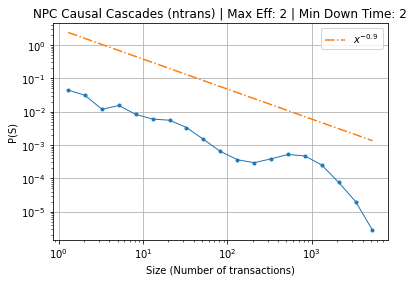

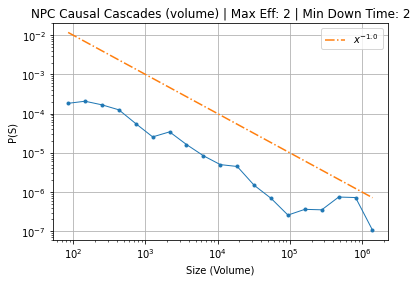

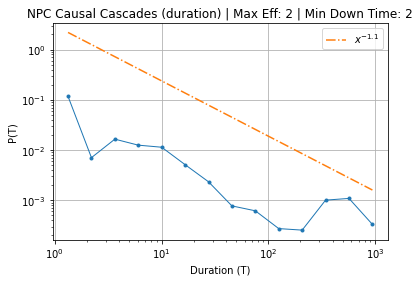

In [16]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*3, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*3, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

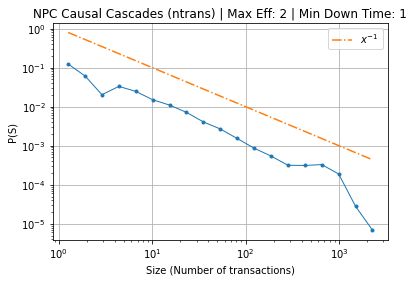

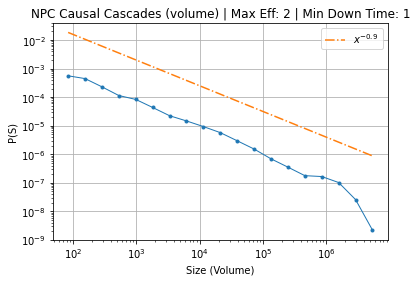

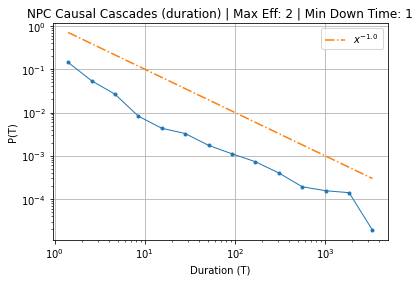

In [13]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9), '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

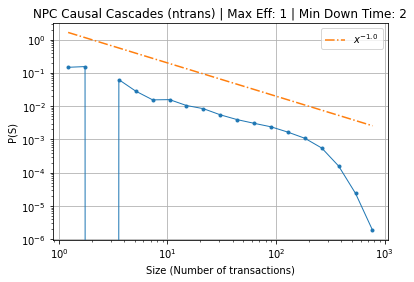

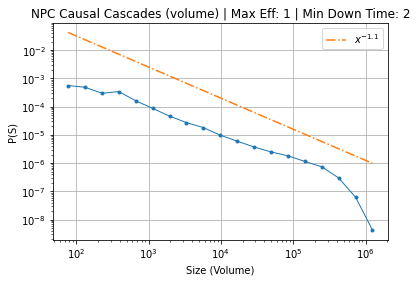

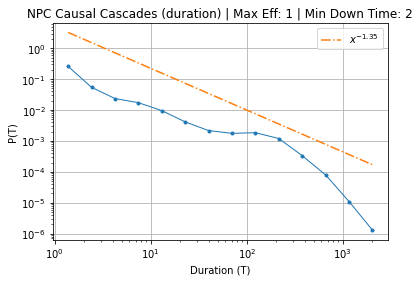

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

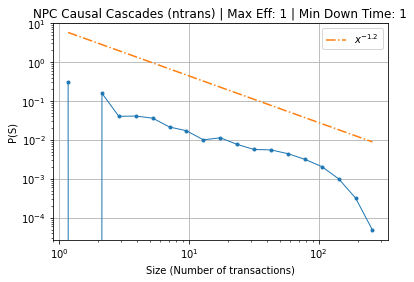

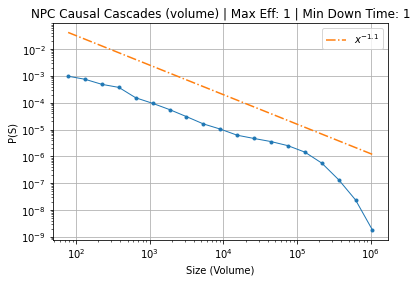

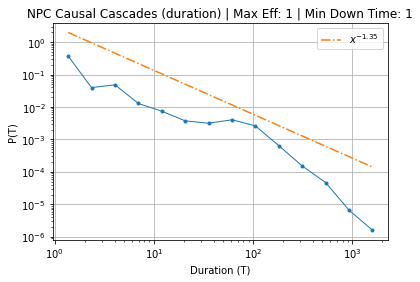

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]